# **ANALYSIS OF AQI**

# 1. Data Pre-Processing 

In [1]:
import pandas as pd

# Load the datasets
city_day_df = pd.read_csv("/kaggle/input/air-pollution/city_day.csv")
city_day_df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [2]:
# Display the first few rows of each dataset to inspect the data
print("City Day Dataset:")
print(city_day_df.head())

City Day Dataset:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [3]:
city_day_df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [4]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
#Basic Stats
print(city_day_df['City'].nunique())
print(city_day_df['City'].unique())

26
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [6]:
# Check for missing data
print("\nMissing Data:")
print(city_day_df.isnull().sum())



Missing Data:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [7]:
#Replace the missing values for numerical columns with mean
city_day_df['PM2.5'].fillna(city_day_df['PM2.5'].mean().round(2),inplace = True )
city_day_df['PM10'].fillna(city_day_df['PM10'].mean().round(2),inplace = True )
city_day_df['NO'].fillna(city_day_df['NO'].mean().round(2),inplace = True )
city_day_df['NO2'].fillna(city_day_df['NO2'].mean().round(2),inplace = True )
city_day_df['NOx'].fillna(city_day_df['NOx'].mean().round(2),inplace = True )
city_day_df['NH3'].fillna(city_day_df['NH3'].mean().round(2),inplace = True )
city_day_df['CO'].fillna(city_day_df['CO'].mean().round(2),inplace = True )
city_day_df['SO2'].fillna(city_day_df['SO2'].mean().round(2),inplace = True )
city_day_df['O3'].fillna(city_day_df['O3'].mean().round(2),inplace = True )
city_day_df['Benzene'].fillna(city_day_df['Benzene'].mean().round(2),inplace = True )
city_day_df['Toluene'].fillna(city_day_df['Toluene'].mean().round(2),inplace = True )
city_day_df['Xylene'].fillna(city_day_df['Xylene'].mean().round(2),inplace = True )
city_day_df['AQI'].fillna(city_day_df['AQI'].mean().round(2),inplace = True )



In [8]:
city_day_df.head()

City        Date  PM2.5    PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  67.45  118.13   0.92  18.22  17.15  23.48   0.92   
1  Ahmedabad  2015-01-02  67.45  118.13   0.97  15.69  16.46  23.48   0.97   
2  Ahmedabad  2015-01-03  67.45  118.13  17.40  19.30  29.70  23.48  17.40   
3  Ahmedabad  2015-01-04  67.45  118.13   1.70  18.48  17.97  23.48   1.70   
4  Ahmedabad  2015-01-05  67.45  118.13  22.10  21.42  37.76  23.48  22.10   

     SO2      O3  Benzene  Toluene  Xylene     AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  166.46        NaN  
1  24.55   34.06     3.68     5.50    3.77  166.46        NaN  
2  29.07   30.70     6.80    16.40    2.25  166.46        NaN  
3  18.59   36.08     4.43    10.14    1.00  166.46        NaN  
4  39.33   39.31     7.01    18.89    2.78  166.46        NaN

In [9]:
# Verify that missing values are handled
print("\nMissing Data After Filling Missing Values:")
print(city_day_df.isnull().sum())


Missing Data After Filling Missing Values:
City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


# AQI Score System: -
# 
Good (0-50)
Satisfactory (51-100)
Moderate (101-200)
Poor (201-300)
Very poor (301-400)
Severe (401-500)

In [10]:
#AQI_BUCKET calculation for city_day_df
city_day_df.loc[(city_day_df['AQI'] >= 0) & (city_day_df['AQI'] <= 50), 'AQI_Bucket'] = 'Good'
city_day_df.loc[(city_day_df['AQI'] >= 51) & (city_day_df['AQI'] <= 100), 'AQI_Bucket'] = 'Satisfactory'
city_day_df.loc[(city_day_df['AQI'] >= 101) & (city_day_df['AQI'] <= 200), 'AQI_Bucket'] = 'Moderate'
city_day_df.loc[(city_day_df['AQI'] >= 201) & (city_day_df['AQI'] <= 300), 'AQI_Bucket'] = 'Poor'
city_day_df.loc[(city_day_df['AQI'] >= 301) & (city_day_df['AQI'] <= 400), 'AQI_Bucket'] = 'Very poor'
city_day_df.loc[(city_day_df['AQI'] >= 401) & (city_day_df['AQI'] <= 500), 'AQI_Bucket'] = 'Severe'

In [11]:
city_day_df

City        Date  PM2.5    PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01  67.45  118.13   0.92  18.22  17.15  23.48   
1          Ahmedabad  2015-01-02  67.45  118.13   0.97  15.69  16.46  23.48   
2          Ahmedabad  2015-01-03  67.45  118.13  17.40  19.30  29.70  23.48   
3          Ahmedabad  2015-01-04  67.45  118.13   1.70  18.48  17.97  23.48   
4          Ahmedabad  2015-01-05  67.45  118.13  22.10  21.42  37.76  23.48   
...              ...         ...    ...     ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02   50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38   74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91   65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64   49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00   66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene     AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00  166.46      Moderate  
1       0.97  24.55   34.06     3.68     5.50    3.77  166.46      Moderate  
2      17.40  29.07   30.70     6.80    16.40    2.25  166.46      Moderate  
3       1.70  18.59   36.08     4.43    10.14    1.00  166.46      Moderate  
4      22.10  39.33   39.31     7.01    18.89    2.78  166.46      Moderate  
...      ...    ...     ...      ...      ...     ...     ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73   41.00          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38   70.00  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00   68.00  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00   54.00  Satisfactory  
29530   0.59   2.10   17.05     3.28     8.70    3.07   50.00          Good  

[29531 rows x 16 columns]

In [12]:
# Verify that missing values are handled
print("\nMissing Data After Filling Missing Values:")
print(city_day_df.isnull().sum())


Missing Data After Filling Missing Values:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [13]:
# Convert date/time columns to appropriate formats
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])


In [14]:
# Display the updated date/time columns
print("\nCity Day Dataset (Updated Date Column):")
print(city_day_df['Date'].head())


City Day Dataset (Updated Date Column):
0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: Date, dtype: datetime64[ns]


In [15]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

# 2.Exploratory Data Analysis

In [16]:
# Display basic statistics of numerical columns
print(city_day_df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      67.450488    118.128196     17.574156     28.560579     32.309248   
std       59.414476     71.500953     21.359220     22.941051     29.317936   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       32.150000     79.315000      6.210000     12.980000     14.670000   
50%       58.030000    118.130000     11.530000     25.240000     27.550000   
75%       72.450000    118.130000     17.570000     34.665000     36.015000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

               NH3            CO           SO2            O3       Benzene  \
count  29531.00000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      23.48226      2.248696     14.531719     34.491236      3.280680   
std       20.71137      6.715753     16.909088     20.

# 2.1 Distribution of Pollutants

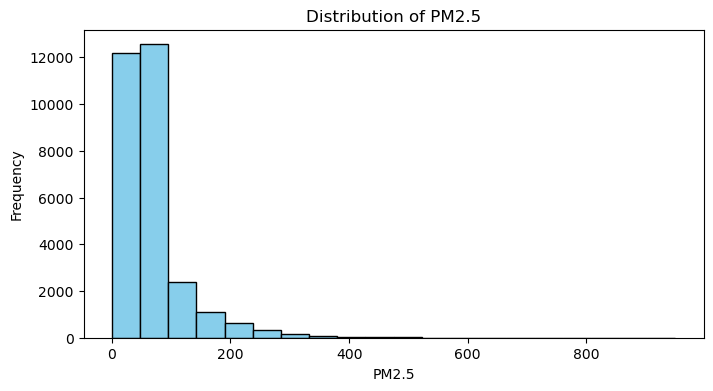

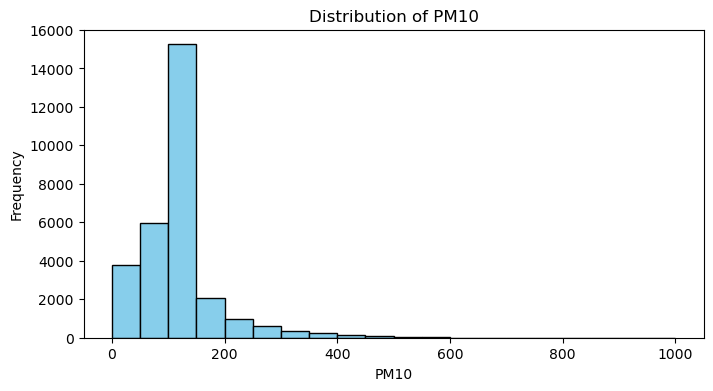

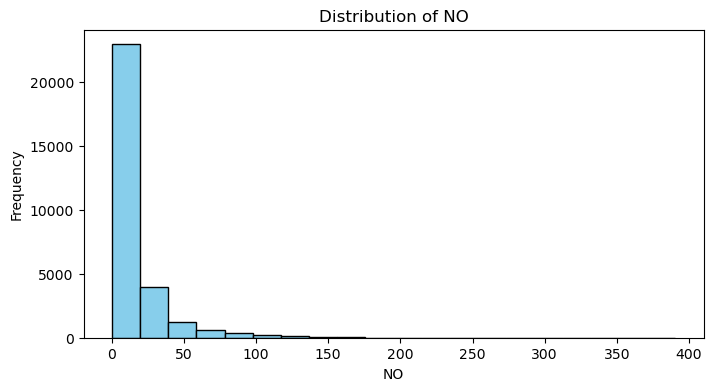

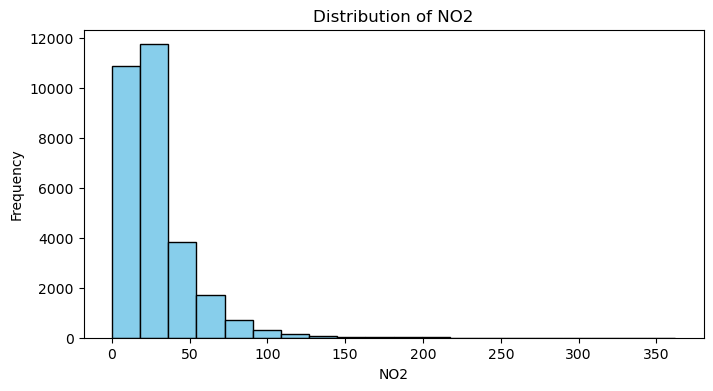

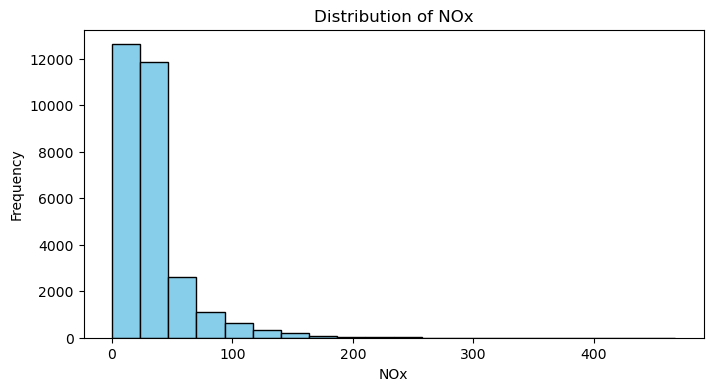

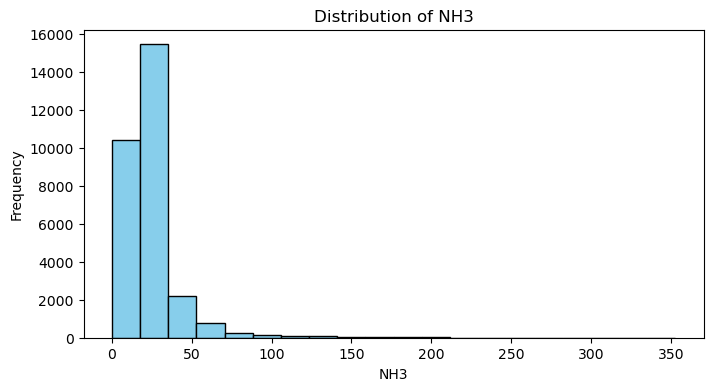

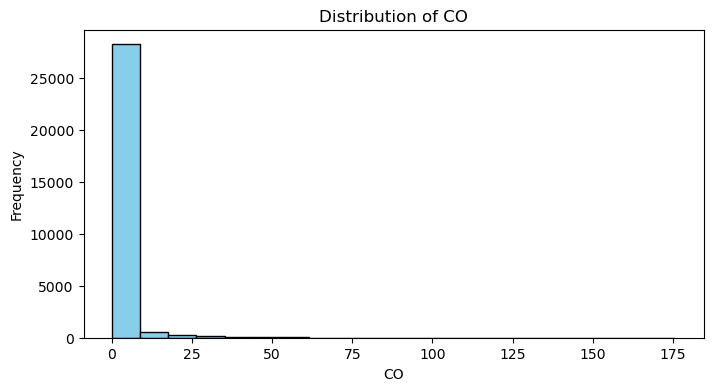

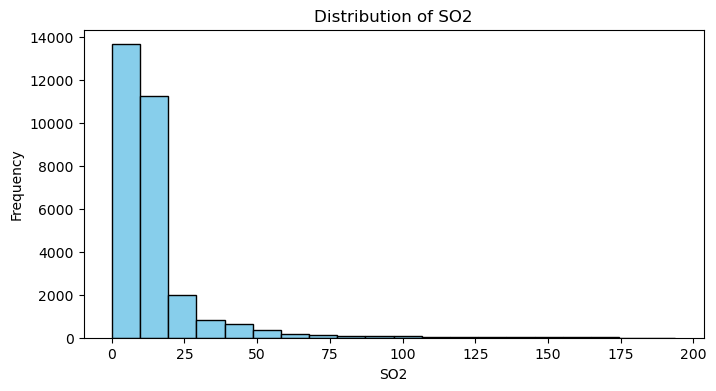

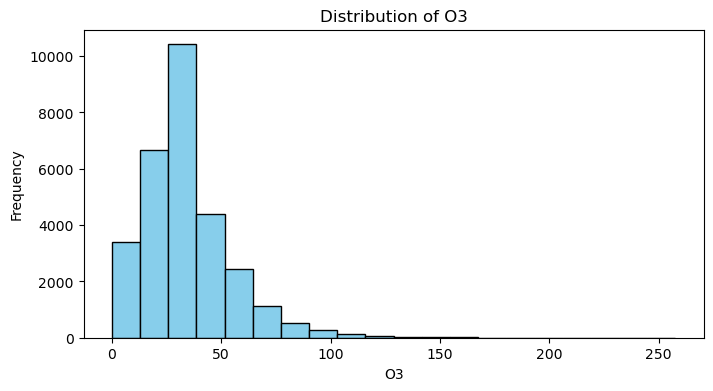

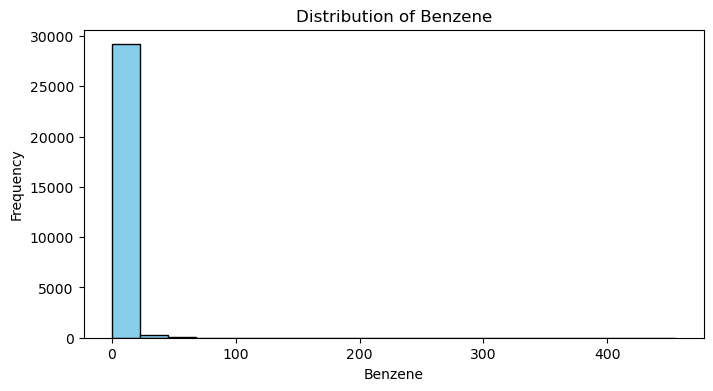

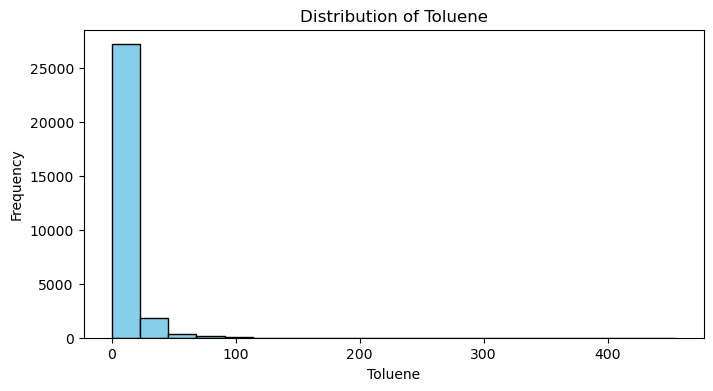

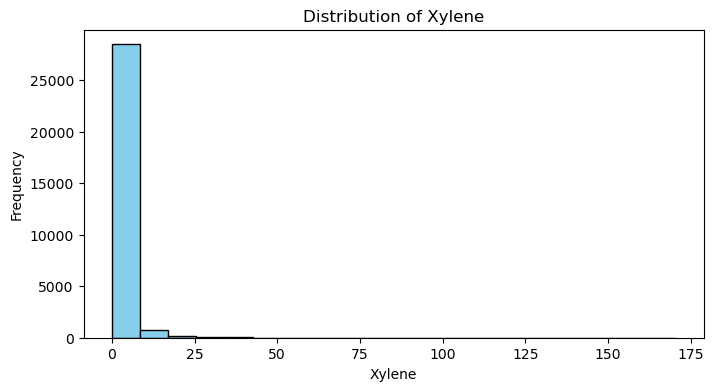

In [17]:
import matplotlib.pyplot as plt

# Select the columns with pollutants
pollutants = city_day_df.columns[2:14]

# Plot histograms for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(8, 4))
    plt.hist(city_day_df[pollutant], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {pollutant}')
    plt.show()

# 2.2 AQI Distribution

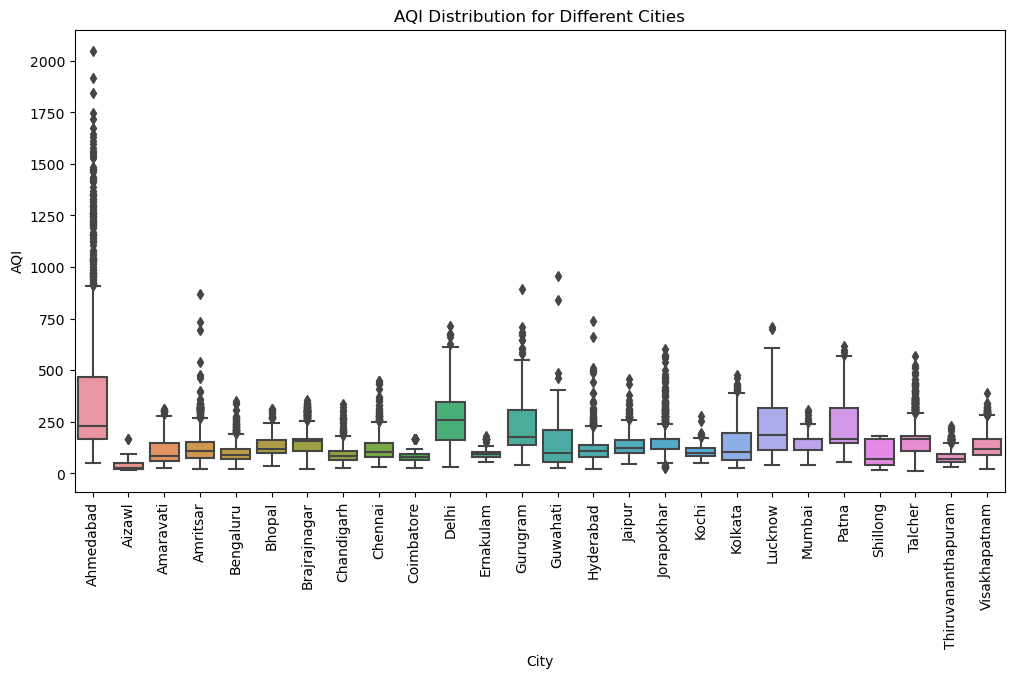

In [18]:
# Analyze the AQI distribution for different cities
import seaborn as sns


# AQI distribution for different cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='AQI', data=city_day_df)
plt.xticks(rotation=90)
plt.title('AQI Distribution for Different Cities')
plt.show()

# 2.3 Overall Trend of pollutants over time

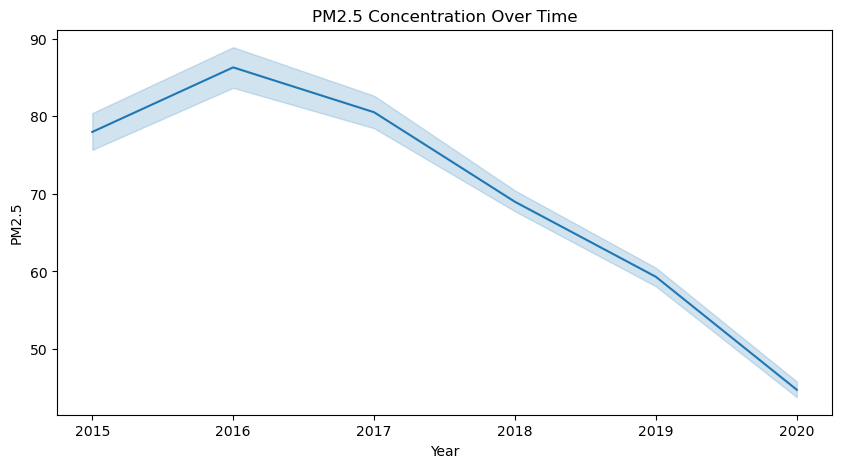

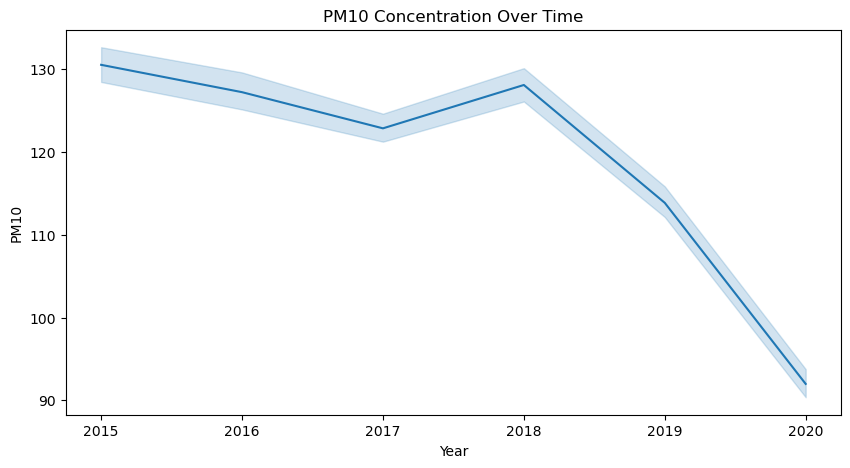

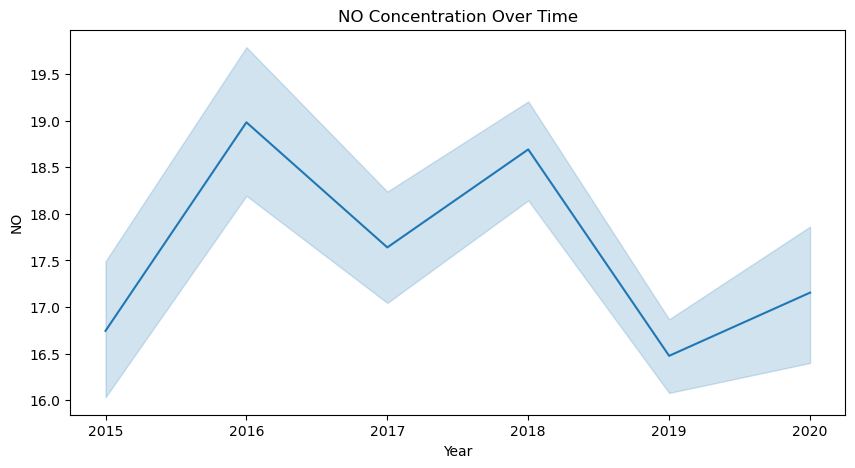

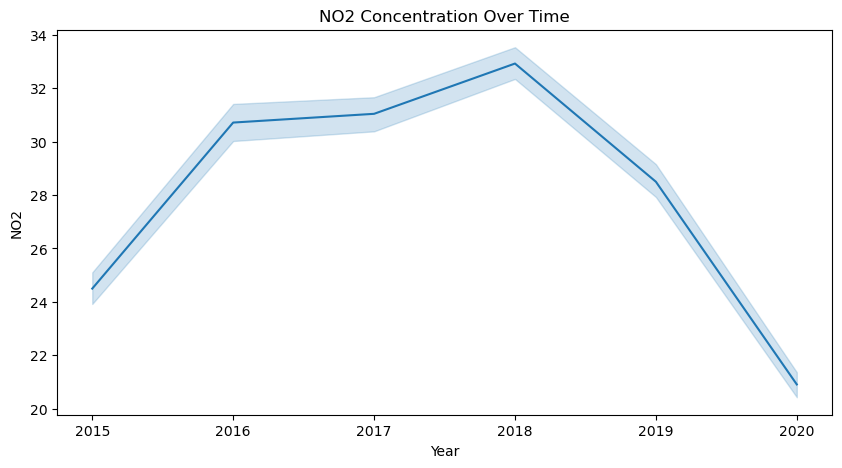

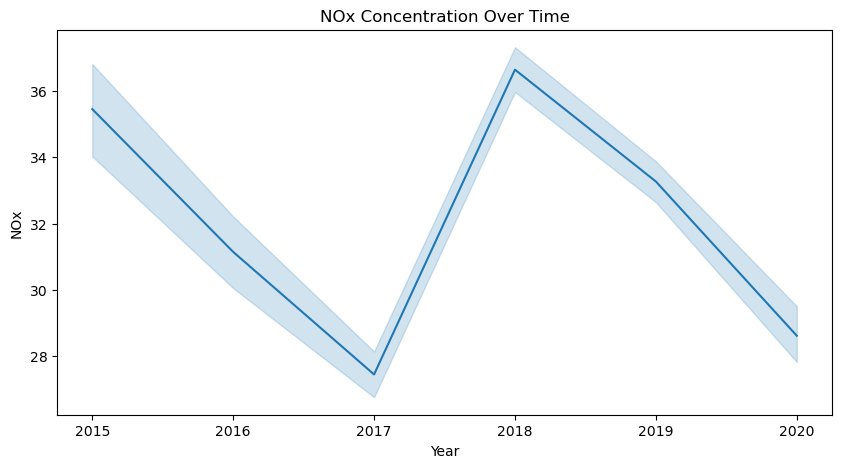

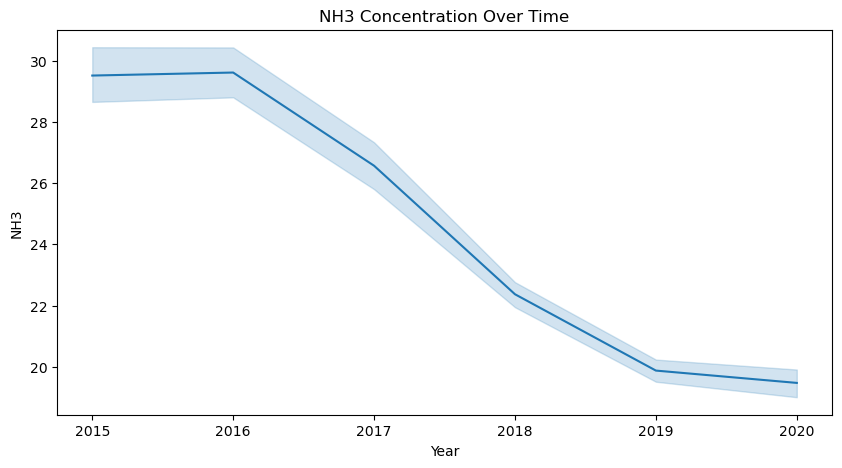

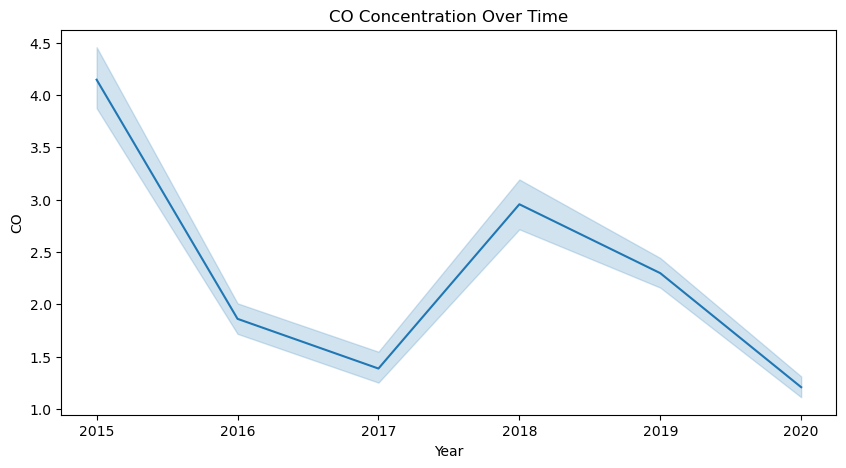

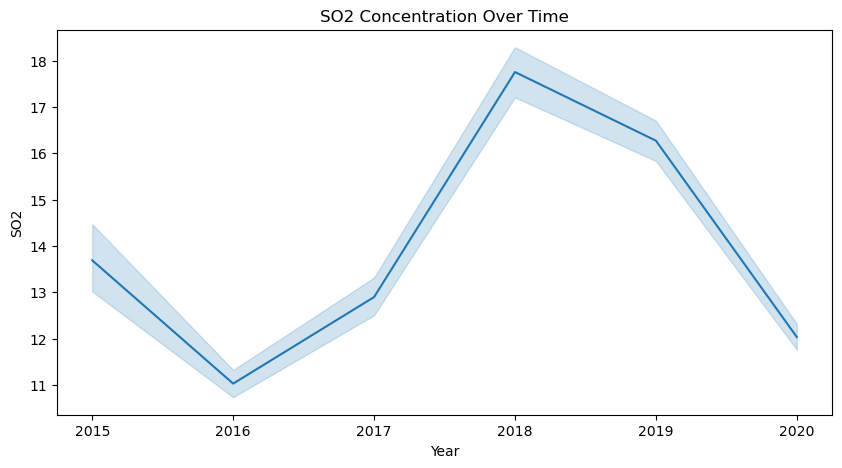

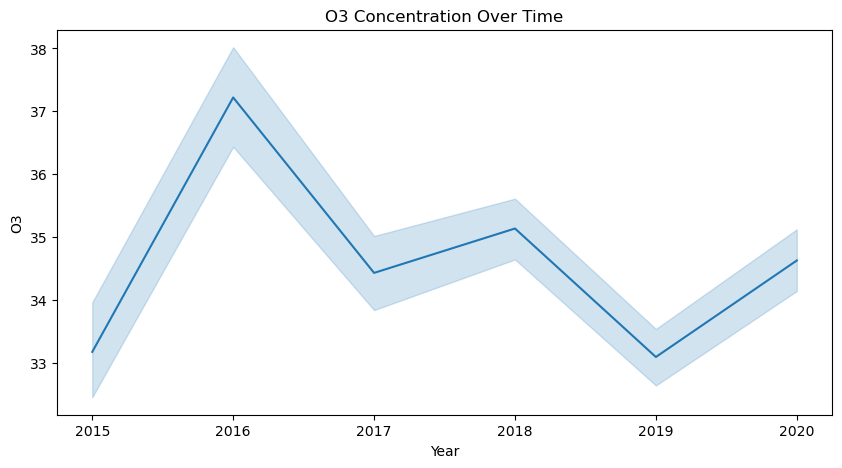

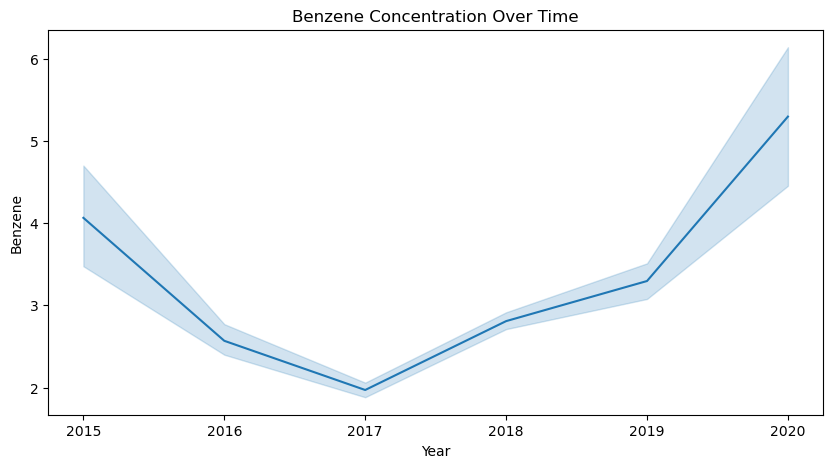

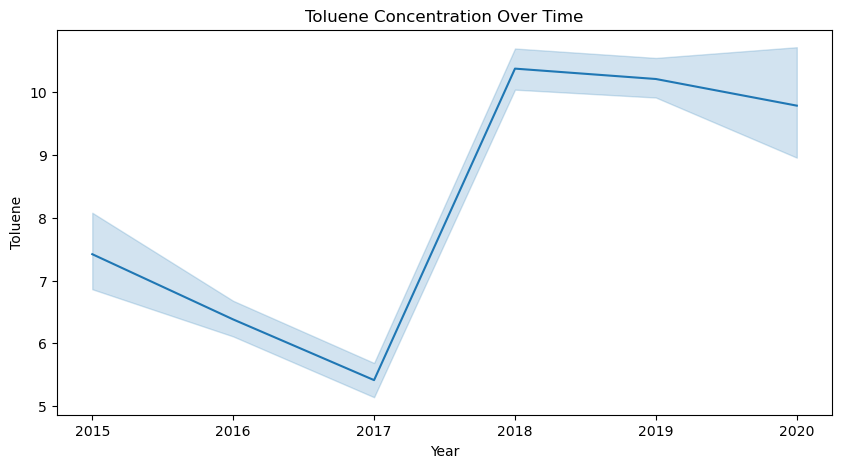

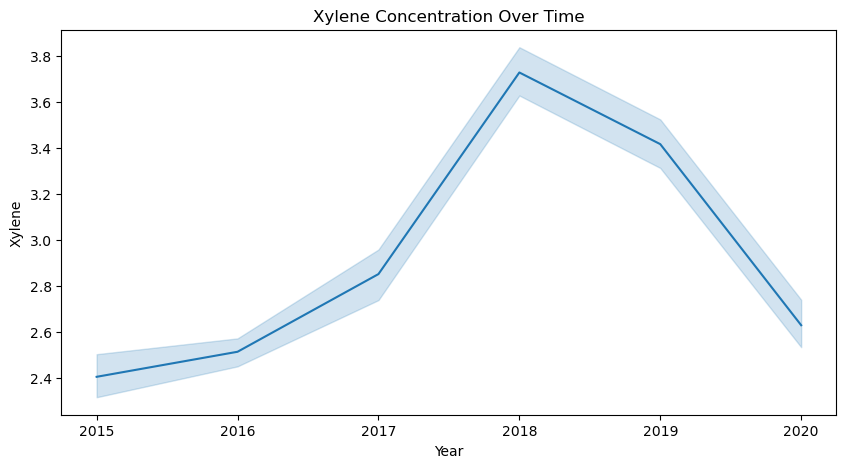

In [19]:
# Look for any seasonal or temporal patterns in pollutant concentrations

# Convert 'Date' column to datetime format
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])

# Extract 'Month' and 'Year' from the 'Date' column
city_day_df['Month'] = city_day_df['Date'].dt.month
city_day_df['Year'] = city_day_df['Date'].dt.year

# Plotting temporal patterns of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Year', y=pollutant, data=city_day_df)
    plt.title(f'{pollutant} Concentration Over Time')
    plt.show()


# 2.4 Overall Trend of Air Quality over Time:


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

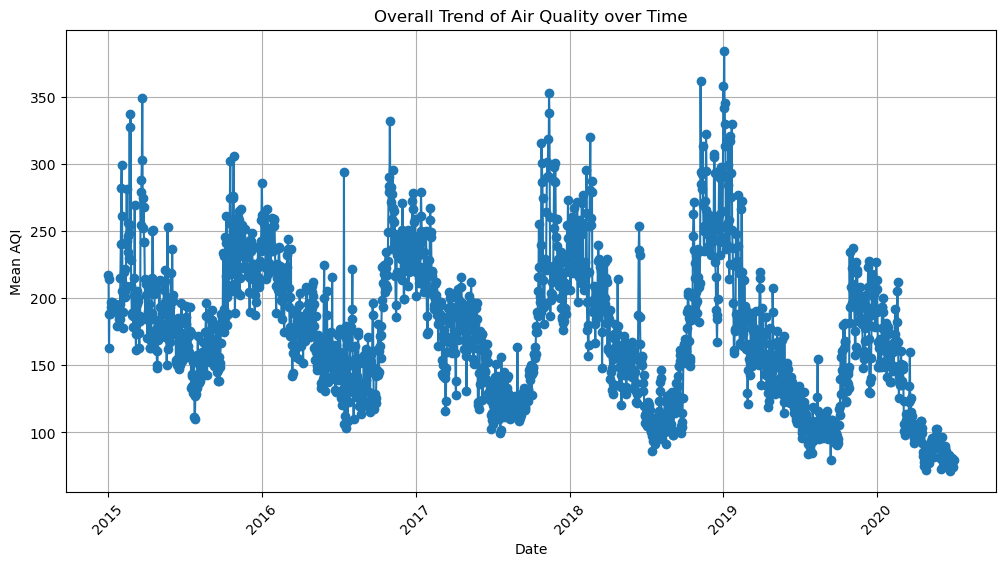

In [21]:
# Group by Date and calculate the mean AQI for all cities on each date
mean_aqi_by_date = city_day_df.groupby('Date')['AQI'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(mean_aqi_by_date.index, mean_aqi_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Mean AQI')
plt.title('Overall Trend of Air Quality over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 2.5 Correlation between AQI and Pollutants:

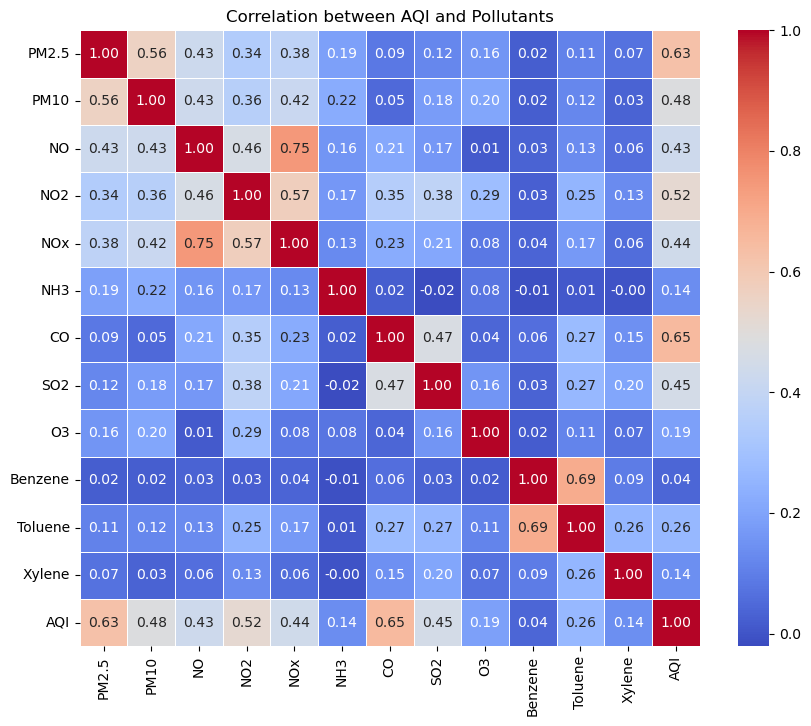

In [22]:
# Select columns for correlation analysis
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Calculate correlation matrix
correlation_matrix = city_day_df[pollutants].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between AQI and Pollutants')
plt.show()


# 2.6 Distribution of AQI Values and Different AQI Buckets:

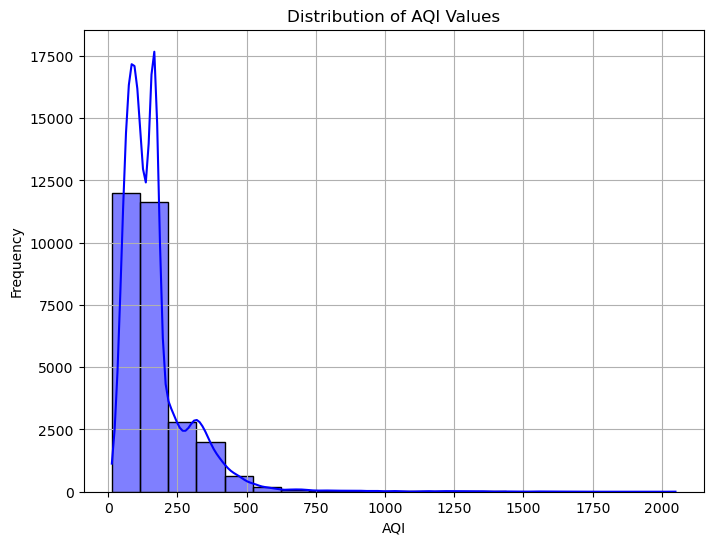

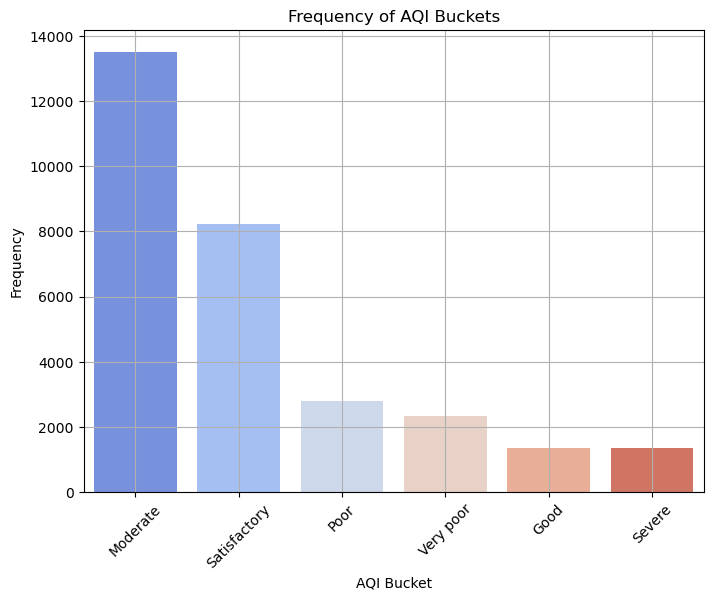

In [23]:
# Plotting histogram
plt.figure(figsize=(8, 6))
sns.histplot(city_day_df['AQI'], bins=20, kde=True, color='blue')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.grid(True)
plt.show()

# Plotting countplot for AQI bucket categories
plt.figure(figsize=(8, 6))
sns.countplot(data=city_day_df, x='AQI_Bucket', order=city_day_df['AQI_Bucket'].value_counts().index, palette='coolwarm')
plt.xlabel('AQI Bucket')
plt.ylabel('Frequency')
plt.title('Frequency of AQI Buckets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 2.7 Seasonal Variation in AQI:

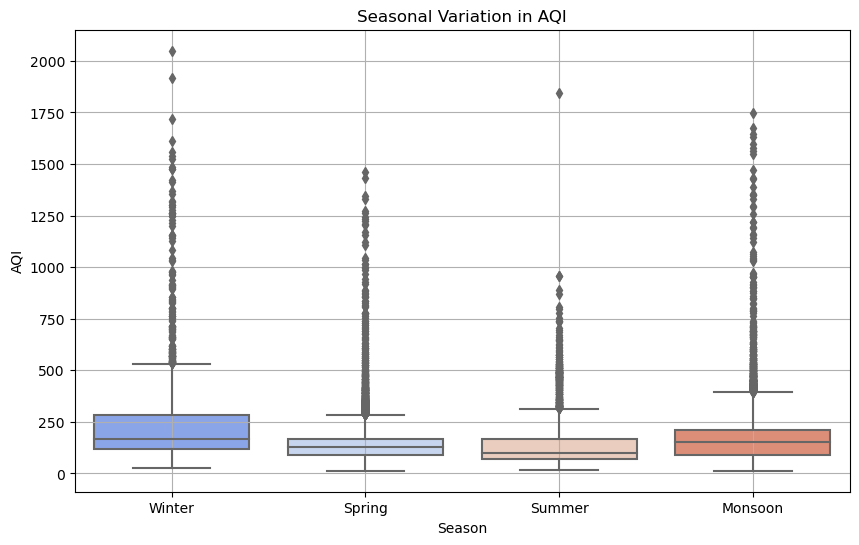

In [24]:
# Extract month and season from the Date column
city_day_df['Month'] = city_day_df['Date'].dt.month
city_day_df['Season'] = city_day_df['Month'].apply(lambda month: 'Winter' if month in [12, 1, 2] else
                                  'Spring' if month in [3, 4, 5] else
                                  'Summer' if month in [6, 7, 8] else
                                  'Monsoon' if month in [9, 10, 11] else 'Unknown')

# Plotting boxplot to compare AQI values across different seasons
plt.figure(figsize=(10, 6))
sns.boxplot(data=city_day_df, x='Season', y='AQI', palette='coolwarm')
plt.xlabel('Season')
plt.ylabel('AQI')
plt.title('Seasonal Variation in AQI')
plt.grid(True)
plt.show()


# 2.8 Impact of Pollutants on AQI Buckets:

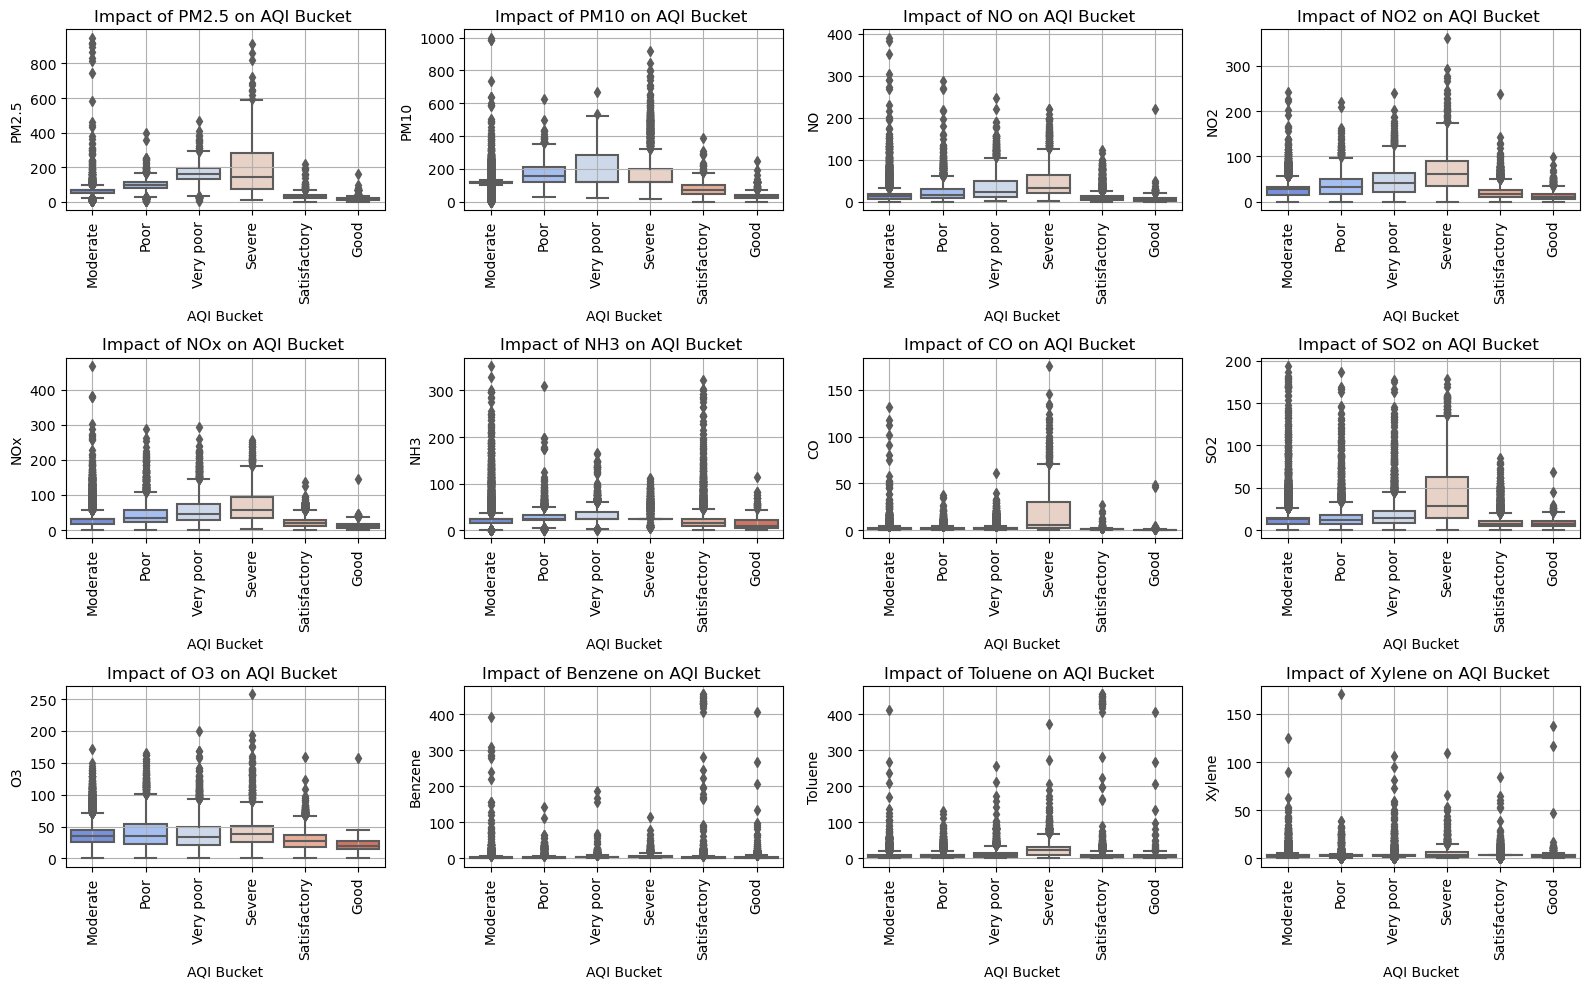

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select pollutants for visualization
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create subplots for each pollutant
plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=city_day_df, x='AQI_Bucket', y=pollutant, palette='coolwarm')
    plt.xlabel('AQI Bucket')
    plt.ylabel(pollutant)
    plt.title(f'Impact of {pollutant} on AQI Bucket ')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()


# 2.9 Most affected cities by AQI

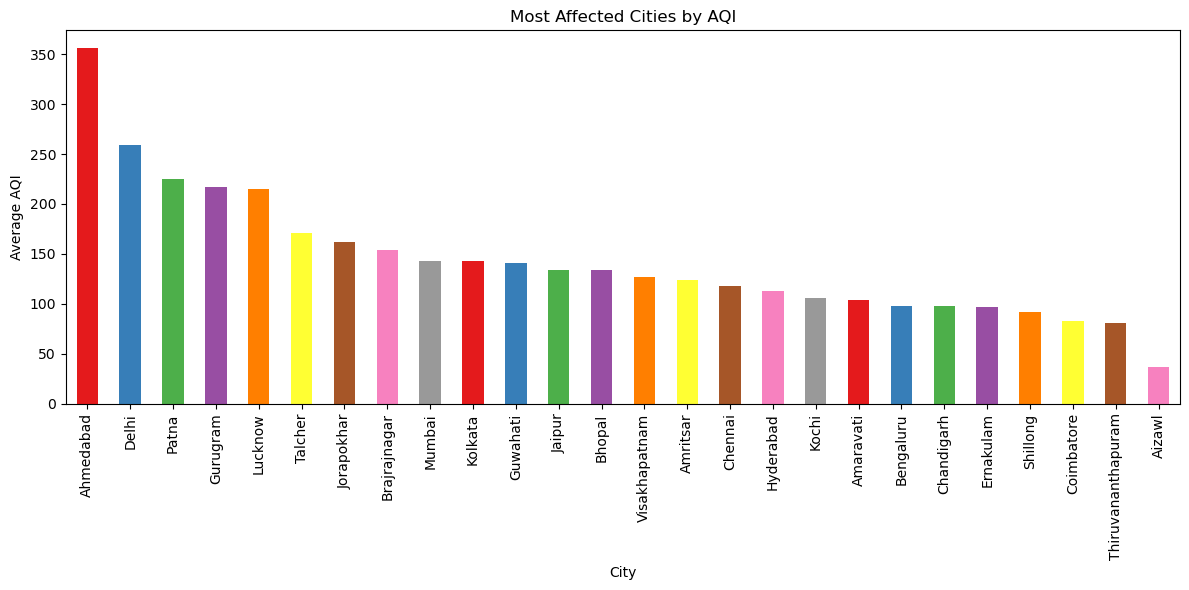

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
city_aqi_avg = city_day_df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# Create a list of distinct colors
num_cities = len(city_aqi_avg)
color_palette = sns.color_palette("Set1", n_colors=num_cities)

# Plot the most affected cities by AQI
plt.figure(figsize=(12, 6))
city_aqi_avg.plot(kind='bar', color=color_palette)
plt.title('Most Affected Cities by AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




# 2.10 The frequency of the different city types present in the whole dataset

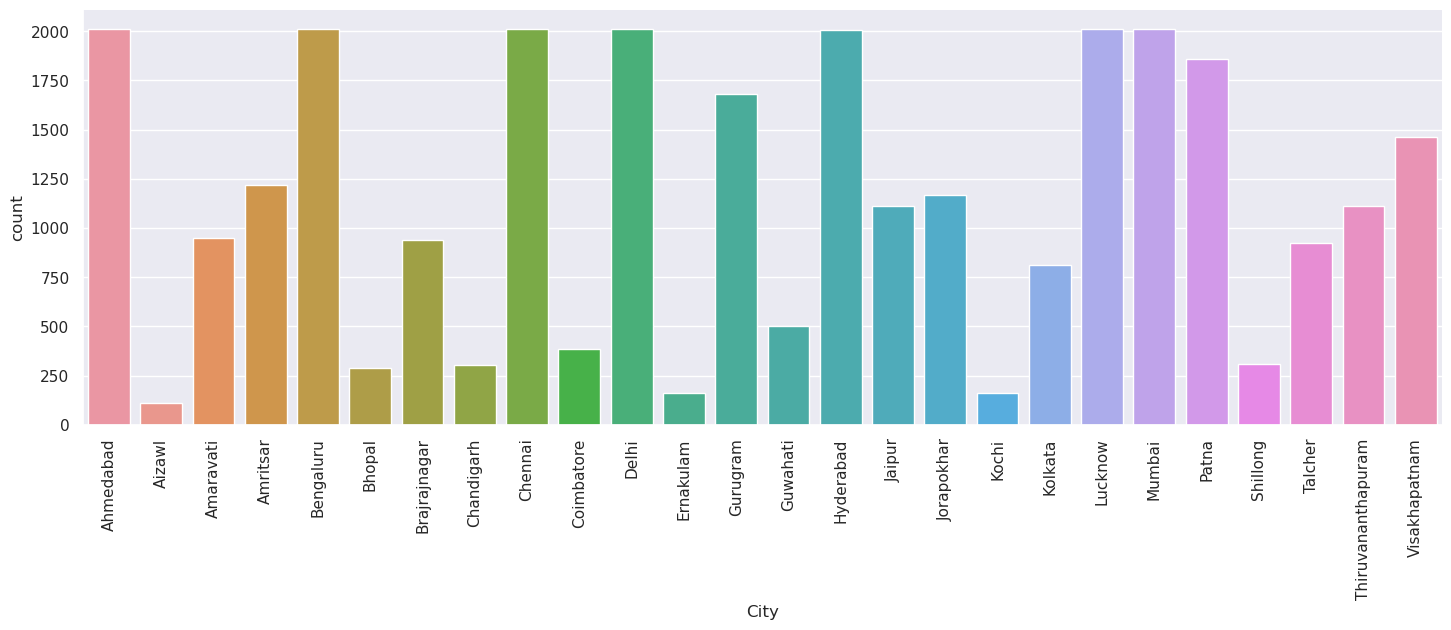

In [27]:
import seaborn as sns
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=city_day_df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

# 2.11 Distribution of AQI Bucket with respect to cities

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


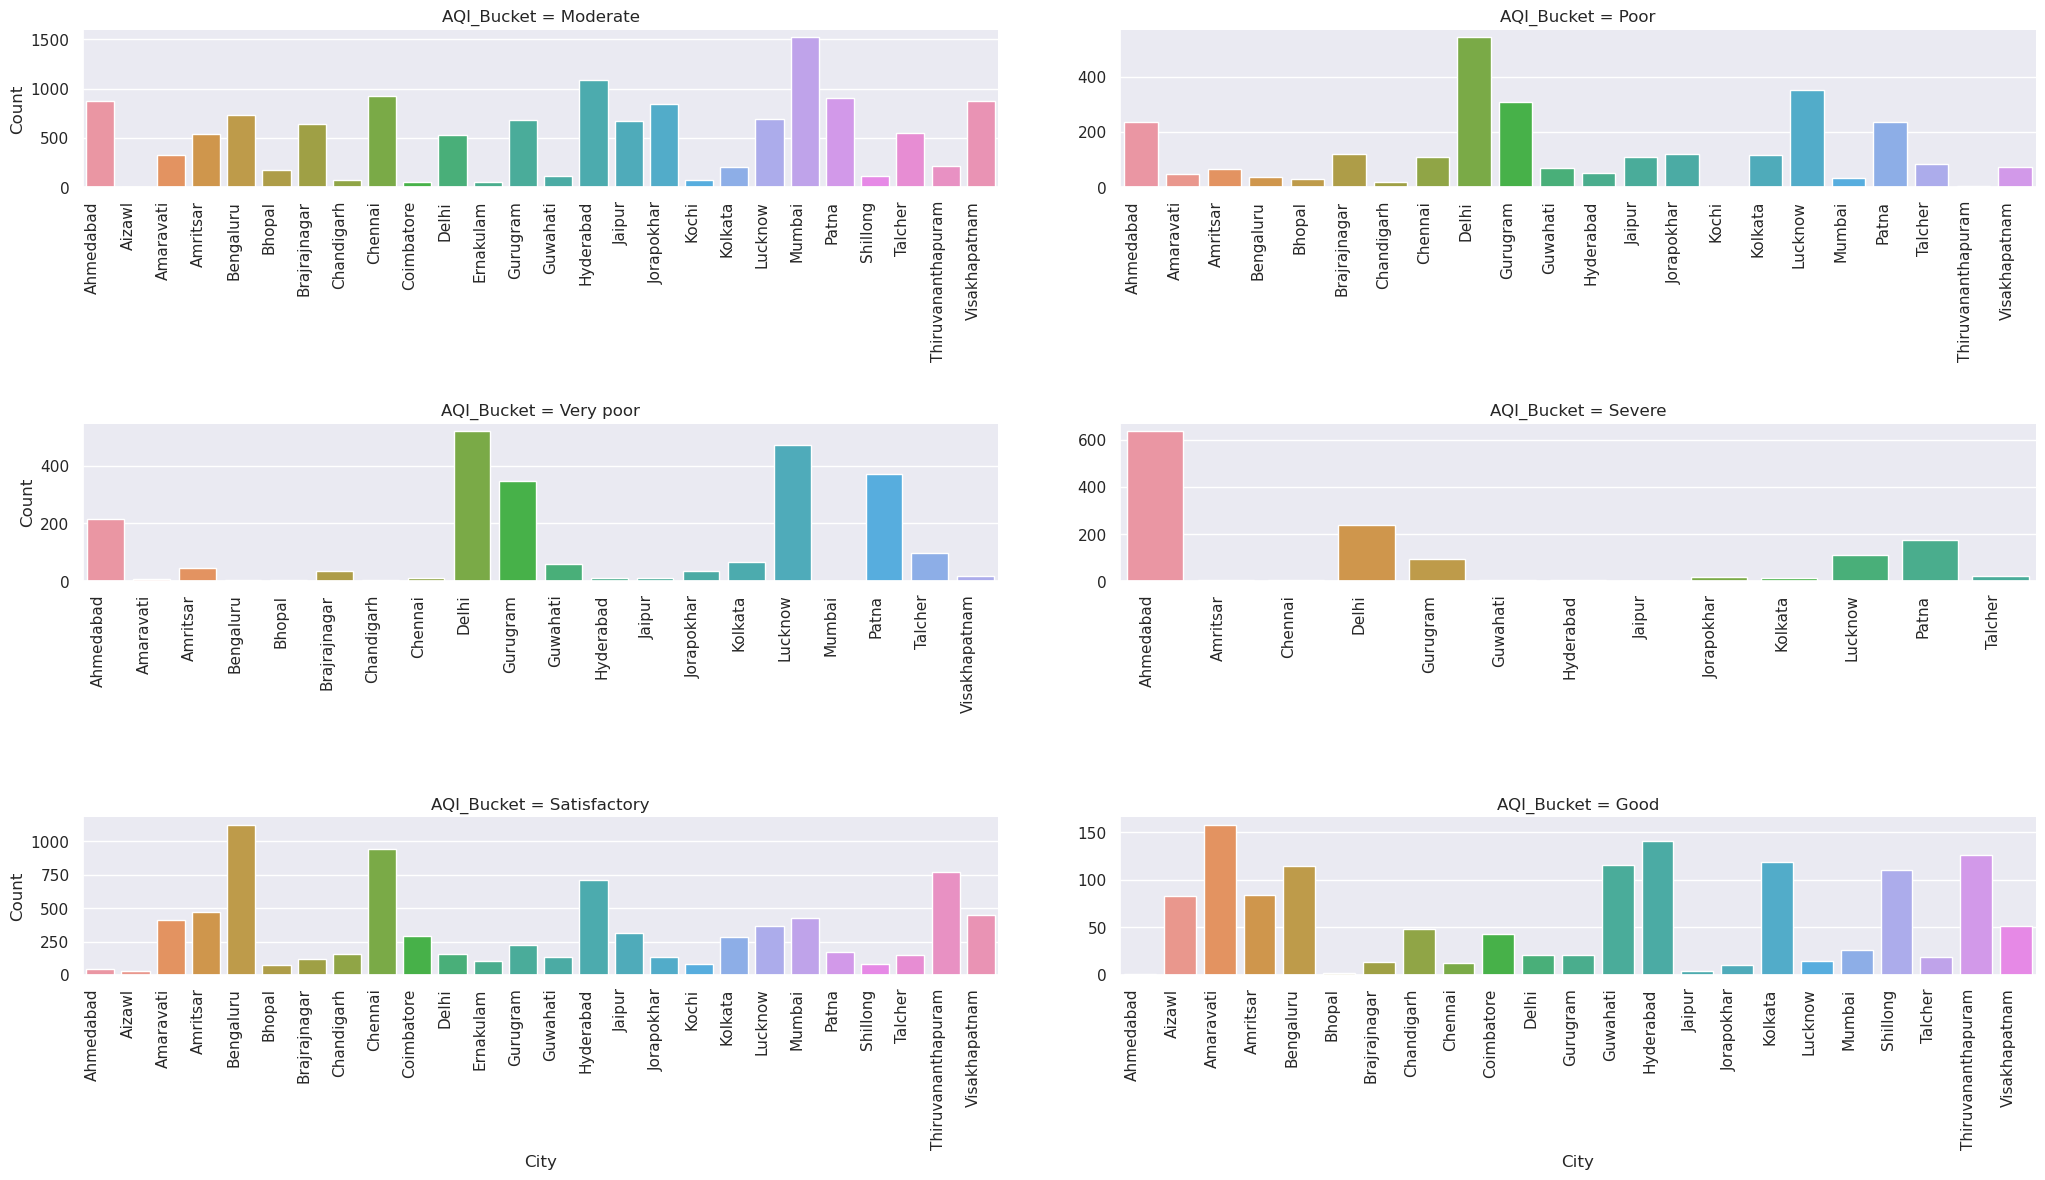

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set(style="darkgrid")

# Create the catplot
graph = sns.catplot(
    x="City",
    kind="count",
    data=city_day_df,
    col="AQI_Bucket",
    col_wrap=2,
    height=3.5,
    aspect=3,
    sharex=False,  # To prevent overlapping x-axis labels
    sharey=False,  # To prevent overlapping y-axis labels
)

# Rotate and align x-axis labels
graph.set_xticklabels(rotation=90, ha='right')

# Set y-axis labels
graph.set_ylabels("Count")

# Adjust layout for better visibility
plt.subplots_adjust(hspace=1.5)

# Show the plot
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


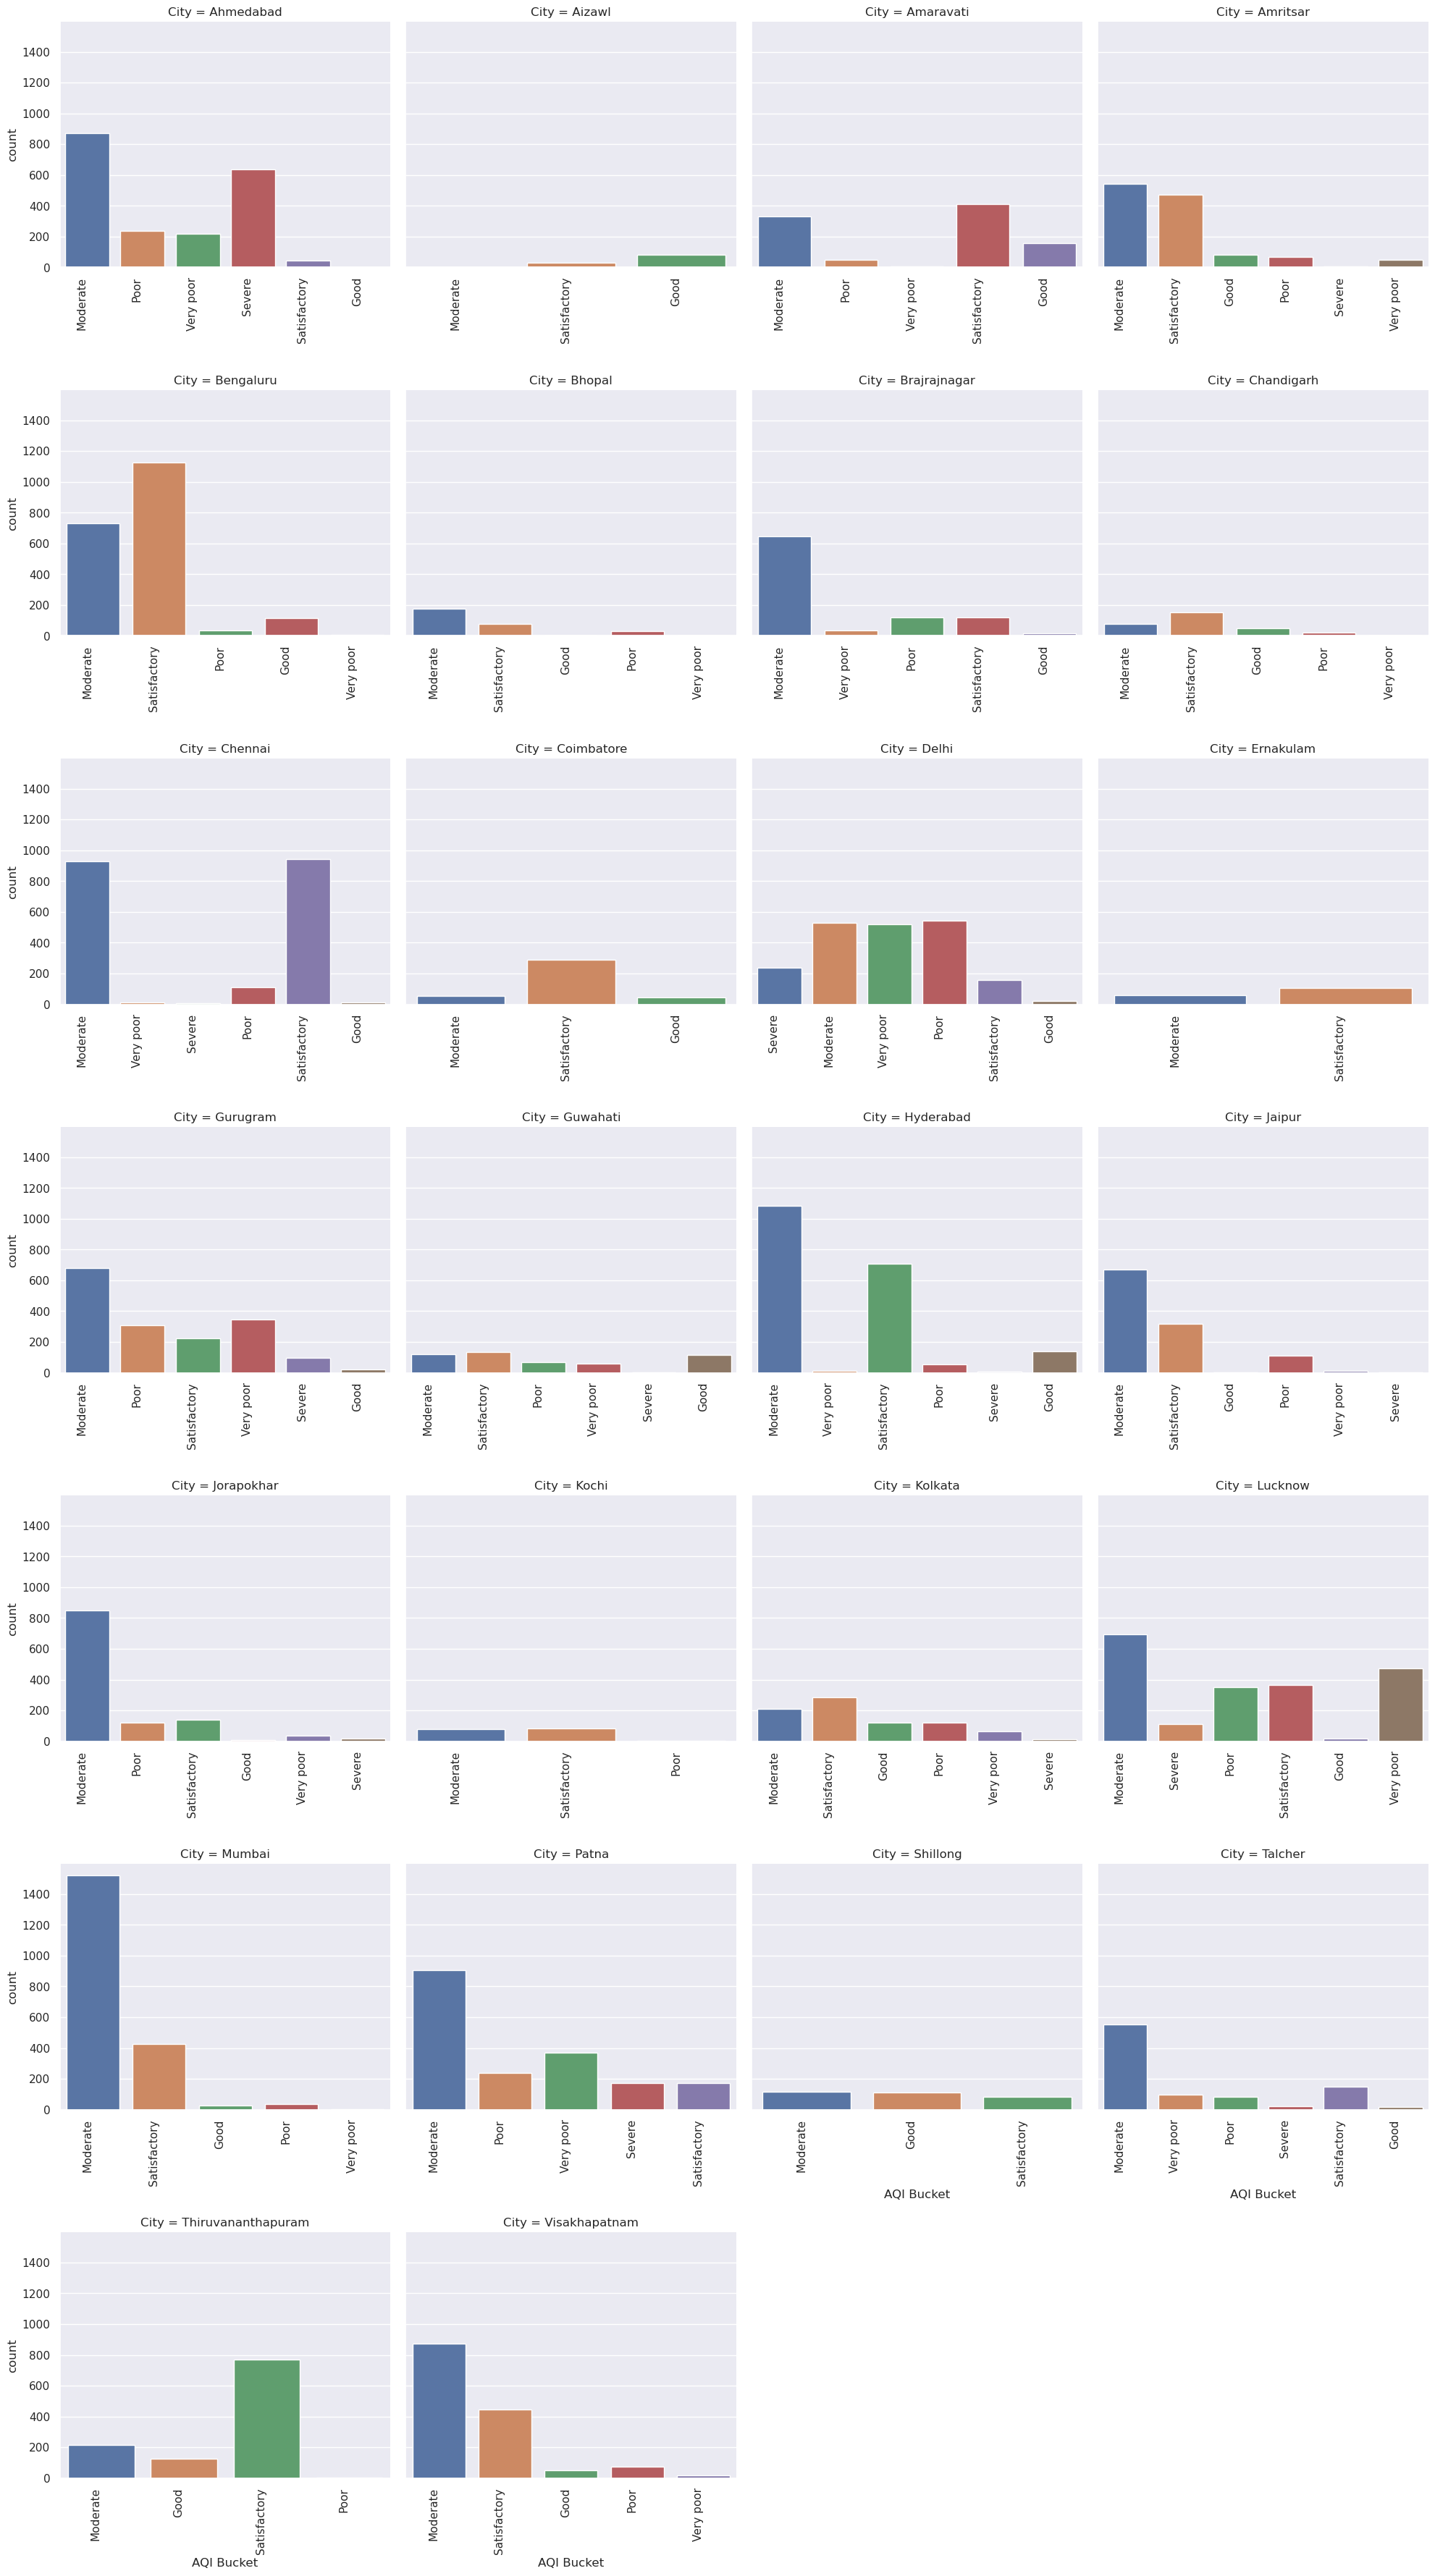

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set(style="darkgrid")

# Create the catplot
graph8 = sns.catplot(
    x="AQI_Bucket",
    kind="count",
    data=city_day_df,
    col="City",
    col_wrap=4,
    sharex=False,  # To prevent overlapping x-axis labels
)

# Rotate and align x-axis labels
graph8.set_xticklabels(rotation=90, ha='right')

# Set x-axis labels
graph8.set_xlabels("AQI Bucket")

# Adjust layout for better visibility
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


# 2.12 Average readings of pollutnats by cities

In [30]:
#average readings by city 
avg_pollutant_readings = city_day_df.groupby('City').mean().reset_index().round(2)
avg_pollutant_readings

/tmp/ipykernel_20/3887355261.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pollutant_readings = city_day_df.groupby('City').mean().reset_index().round(2)


City   PM2.5    PM10     NO    NO2    NOx    NH3     CO  \
0            Ahmedabad   67.73  117.41  20.96  49.81  42.92  23.48  16.15   
1               Aizawl   18.02   24.19   9.41   0.39  12.61  22.31   0.28   
2            Amaravati   39.61   78.78   5.20  22.54  16.36  12.65   0.79   
3             Amritsar   56.72  115.35  18.64  18.88  34.86  14.69   0.66   
4            Bengaluru   38.12   89.49   9.43  28.00  19.74  22.13   1.84   
5               Bhopal   50.60  119.29   7.37  31.26  22.74  19.21   0.92   
6         Brajrajnagar   64.73  123.09  17.37  19.52  25.99  33.48   1.87   
7           Chandigarh   42.43   85.66  10.59  11.83  15.29  30.54   0.63   
8              Chennai   51.42  109.82   9.34  17.07  17.93  54.26   1.08   
9           Coimbatore   29.95   39.44   8.83  28.78  30.90  14.01   0.96   
10               Delhi  117.15  228.41  38.96  50.76  58.57  41.91   1.98   
11           Ernakulam   25.99   50.06  23.05  12.16  24.49  20.71   1.64   
12            Gurugram  112.55  150.47  17.54  23.80  30.17  23.67   1.32   
13            Guwahati   63.69  116.60  20.04  13.60  44.28  11.09   0.74   
14           Hyderabad   48.21   96.57   7.95  28.39  19.48  17.51   0.59   
15              Jaipur   54.64  123.42  14.68  32.37  38.90  26.47   0.81   
16          Jorapokhar   66.41  142.24  12.53  13.78  32.31  12.19   1.36   
17               Kochi   31.43   67.34  71.10  15.45  68.41   9.54   1.30   
18             Kolkata   64.57  115.80  26.55  40.03  63.33  18.37   0.80   
19             Lucknow  107.57  118.13  15.26  33.19  24.10  26.40   2.13   
20              Mumbai   54.86  110.01  22.70  27.43  49.39  21.58   0.59   
21               Patna  113.82  119.02  30.28  36.51  44.46  22.95   1.59   
22            Shillong   38.39   59.10   4.09   7.66   4.33   6.75   0.45   
23             Talcher   62.61  156.55  28.07  17.34  31.97  13.92   1.91   
24  Thiruvananthapuram   29.53   55.09   3.85   9.91   8.53   6.93   0.97   
25       Visakhapatnam   50.19  107.92  13.48  35.73  25.42  12.80   0.78   

      SO2     O3  Benzene  Toluene  Xylene     AQI  Month     Year  
0   42.28  37.56     4.90    23.16    3.96  356.14   6.25  2017.27  
1    7.38   6.16     8.94    10.04    3.07   37.10   4.65  2020.00  
2   14.28  37.91     0.76     2.42    1.57  103.53   6.16  2018.73  
3    9.03  23.55     4.04     4.02    6.61  123.54   6.31  2018.35  
4    5.55  32.98     3.23     4.94    3.07   97.87   6.25  2017.27  
5   13.11  59.06     3.28     8.70    3.07  134.11   6.17  2019.63  
6   10.76  20.47     4.55     8.70    3.07  154.16   6.09  2018.75  
7   10.16  20.05     5.07     1.40    2.62   97.65   6.31  2019.60  
8    8.00  32.49     1.93     3.36    3.07  117.74   6.25  2017.27  
9    8.65  28.88     0.03     0.11    3.07   83.19   6.49  2019.47  
10  15.83  50.62     3.54    17.19    2.07  259.02   6.25  2017.27  
11   3.46  34.49     0.67     1.45    0.22   96.48   3.85  2020.00  
12   9.95  34.41     2.13     6.84    3.26  217.23   6.31  2017.72  
13  14.66  25.09     4.04     8.70    3.07  140.48   5.91  2019.36  
14   9.24  33.62     1.31     7.93    1.77  112.80   6.26  2017.28  
15  11.11  46.55     1.60     6.73    3.07  134.27   6.51  2018.48  
16  27.91  32.94     3.28     8.70    3.07  161.71   6.44  2018.41  
17  17.60   3.82     3.28     0.00    3.07  105.82   3.85  2020.00  
18   8.86  30.90    10.86    15.39    2.83  142.47   6.38  2018.90  
19  10.10  36.88     2.91     5.20    3.07  215.00   6.25  2017.27  
20  14.79  33.92     1.33     4.31    1.52  142.89   6.25  2017.27  
21  21.29  36.84     1.81    10.22    5.17  224.82   6.51  2017.46  
22   8.00  29.15    34.69    35.37    3.07   91.96   6.34  2019.59  
23  25.60  20.36     0.91     7.13    3.07  171.31   6.00  2018.78  
24   5.90  34.68     3.28     8.70    3.07   80.77   6.52  2018.48  
25  12.95  37.05     3.88     8.36    2.80  127.06   6.52  2018.00

In [31]:
avg_pollutant_readings.describe().T

count         mean        std      min        25%       50%  \
PM2.5     26.0    57.728462  27.508158    18.02    38.6950    53.030   
PM10      26.0   104.586538  42.134184    24.19    80.5000   112.680   
NO        26.0    17.971923  13.924665     3.85     9.3575    14.970   
NO2       26.0    24.084231  12.566666     0.39    14.1975    23.170   
NOx       26.0    31.056923  16.472431     4.33    19.5450    28.080   
NH3       26.0    20.751923  10.722767     6.75    13.0800    19.960   
CO        26.0     1.697692   2.994228     0.28     0.7500     0.965   
SO2       26.0    13.325000   8.294535     3.46     8.7025    10.460   
O3        26.0    31.555000  11.769350     3.82    26.0375    33.300   
Benzene   26.0     4.471154   6.613644     0.03     1.6525     3.280   
Toluene   26.0     8.425769   7.591385     0.00     4.0925     7.530   
Xylene    26.0     2.976154   1.154795     0.22     2.8075     3.070   
AQI       26.0   143.427692  66.441364    37.10    99.2850   130.585   
Month     26.0     6.041538   0.736992     3.85     6.1625     6.250   
Year      26.0  2018.485000   0.999813  2017.27  2017.3250  2018.480   

               75%      max  
PM2.5      64.6900   117.15  
PM10      119.2225   228.41  
NO         22.2650    71.10  
NO2        32.0925    50.76  
NOx        41.9150    68.41  
NH3        23.6225    54.26  
CO          1.6275    16.15  
SO2        14.7575    42.28  
O3         36.8700    59.06  
Benzene     4.0400    34.69  
Toluene     8.7000    35.37  
Xylene      3.0700     6.61  
AQI       159.8225   356.14  
Month       6.3700     6.52  
Year     2019.4425  2020.00

In [32]:
# avg readings for PM2.5 across all cities (pie chart)
import plotly.graph_objs as go
Pie1=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['PM2.5'].round(2),
             title='Average PM2.5 readings by City')
fig=go.Figure(Pie1)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for PM10 across all cities (pie chart)
Pie2=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['PM10'].round(2),
             title='Average PM10 readings by City')
fig=go.Figure(Pie2)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for NO across all cities (pie chart)
Pie3=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['NO'].round(2),
             title='Average NO readings by City')
fig=go.Figure(Pie3)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for NO2 across all cities (pie chart)
Pie4=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['NO2'],
             title='Average NO2 readings by City')
fig=go.Figure(Pie4)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for NOx across all cities (pie chart)
Pie5=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['NOx'],
             title='Average NOx readings by City')
fig=go.Figure(Pie5)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for NH3 across all cities (pie chart)
Pie6=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['NH3'],
             title='Average NH3 readings by City')
fig=go.Figure(Pie6)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# avg readings for CO across all cities (pie chart)
Pie7=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['CO'].round(2),
             title='Average CO readings by City')
fig=go.Figure(Pie7)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# avg readings for SO2 across all cities (pie chart)
Pie8=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['SO2'],
             title='Average SO2 readings by City')
fig=go.Figure(Pie8)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# avg readings for O3 across all cities (pie chart)
Pie9=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['O3'],
             title='Average O3 readings by City')
fig=go.Figure(Pie9)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# avg readings for Benzene across all cities (pie chart)
Pie10=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['Benzene'].round(2),
             title='Average Benzene readings by City')
fig=go.Figure(Pie10)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for Toluene across all cities (pie chart)
Pie11=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['Toluene'],
             title='Average Toluene readings by City')
fig=go.Figure(Pie11)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for Xylene across all cities (pie chart)
Pie12=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['Xylene'],
             title='Average Xylene readings by City')
fig=go.Figure(Pie12)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# avg readings for AQI across all cities (pie chart)
Pie13=go.Pie(labels=avg_pollutant_readings['City'], values=avg_pollutant_readings['AQI'],
             title='Average AQI readings by City')
fig=go.Figure(Pie13)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()





# 2.13 Comparative Analysis between Cities:

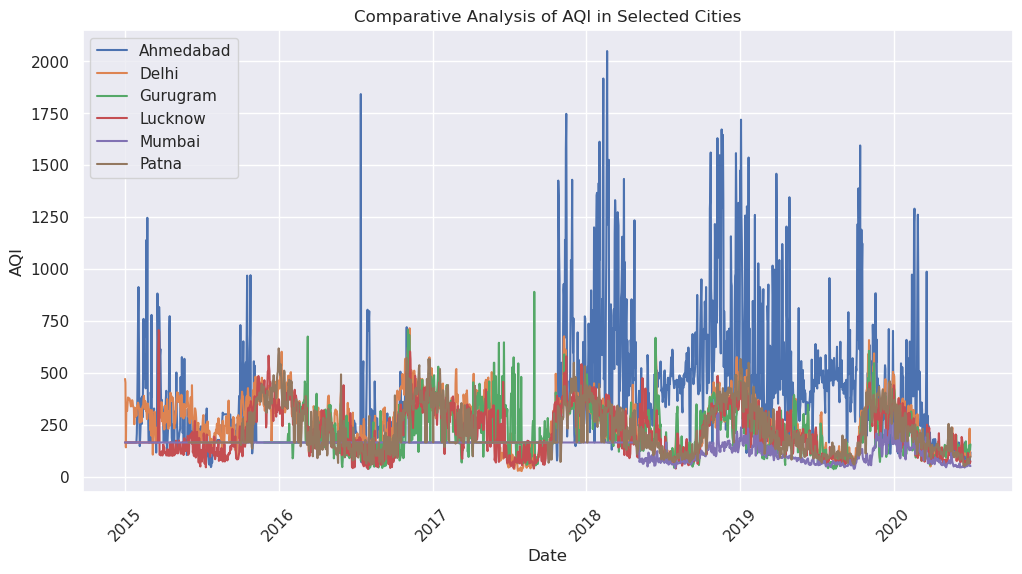

In [33]:
# Select cities for comparative analysis
cities = ['Ahmedabad','Delhi',
          'Gurugram',
          'Lucknow', 'Mumbai', 'Patna']

# Plotting line chart to compare AQI values of selected cities over time
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = city_day_df[city_day_df['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI'], label=city)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Comparative Analysis of AQI in Selected Cities')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



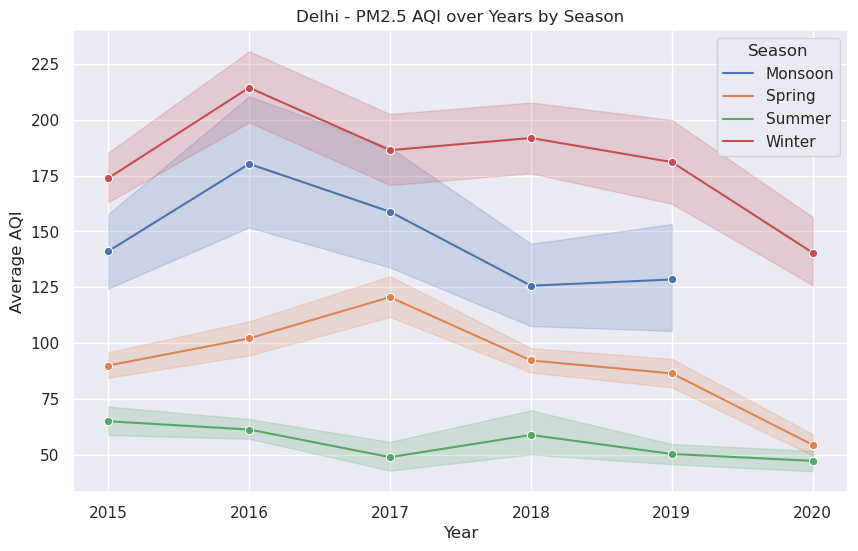

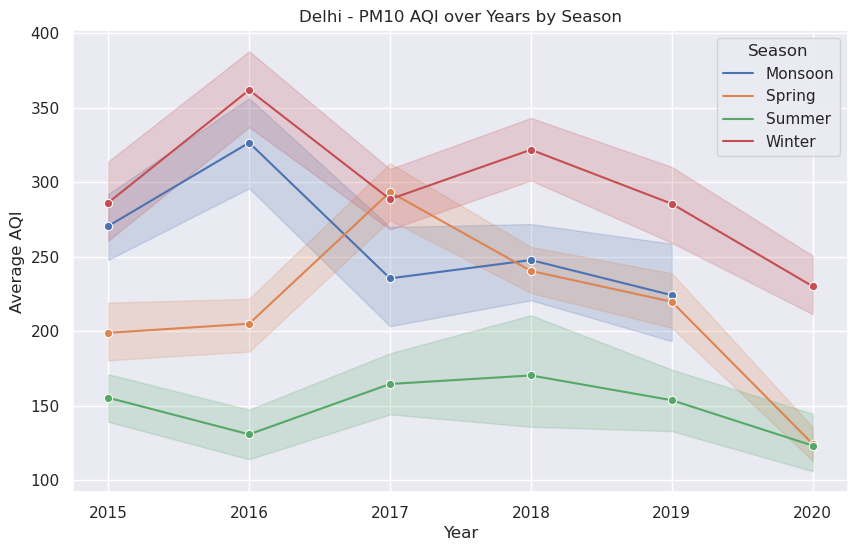

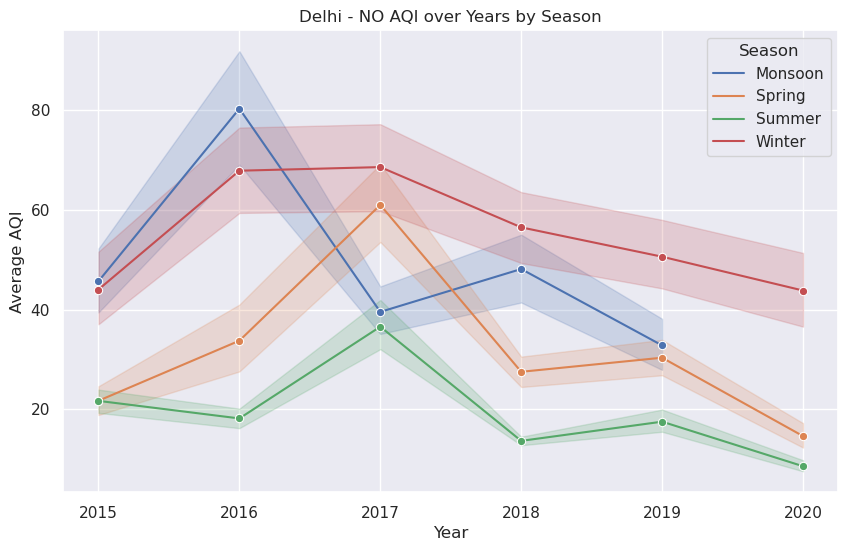

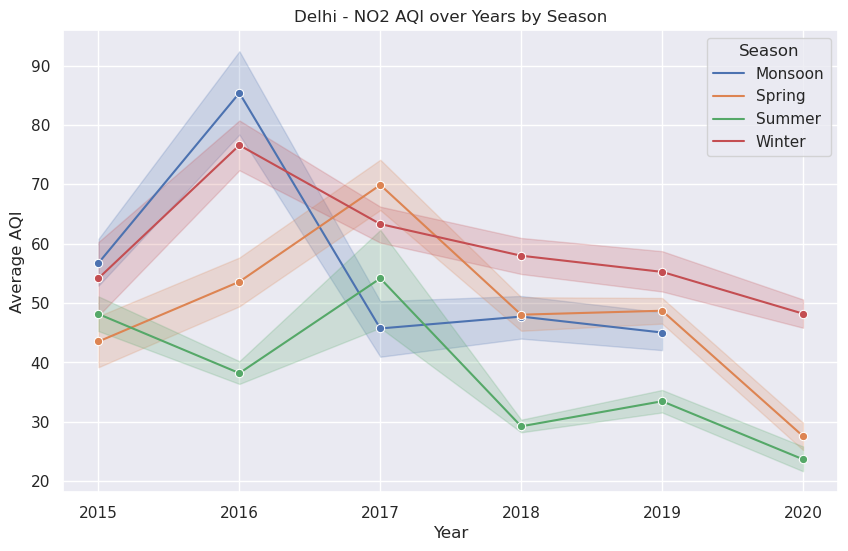

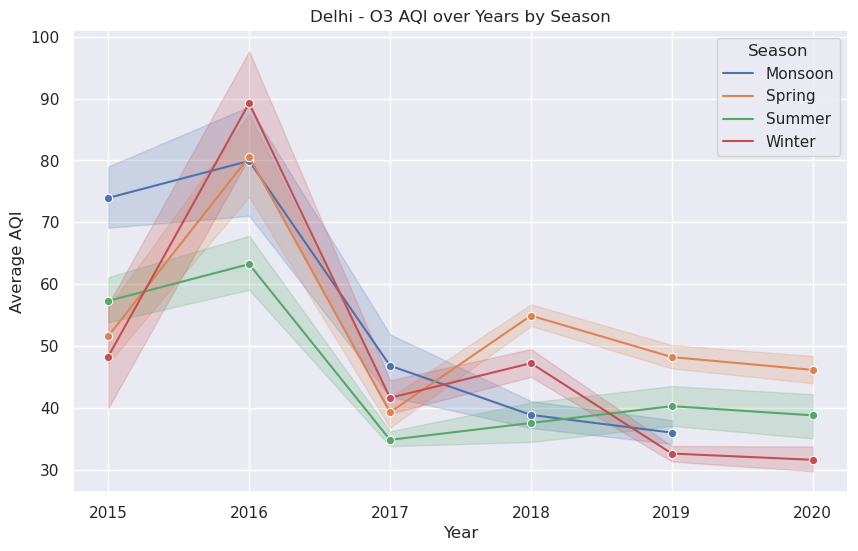

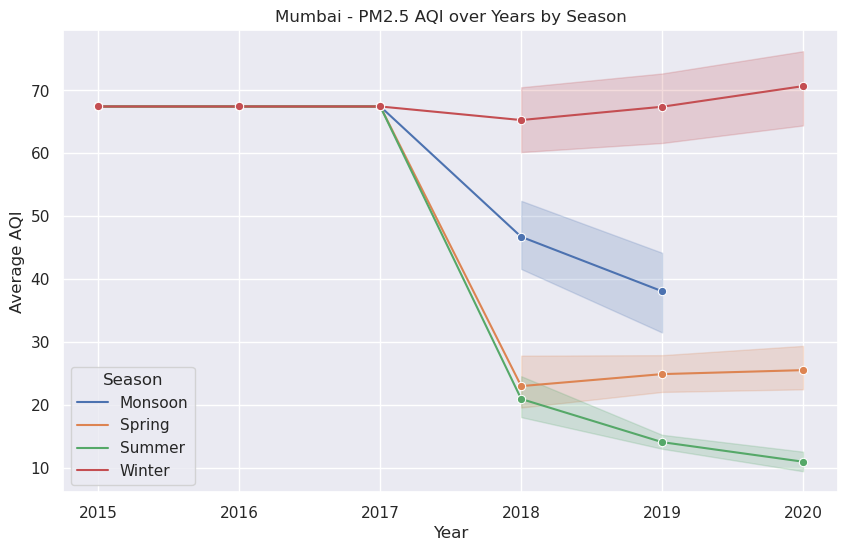

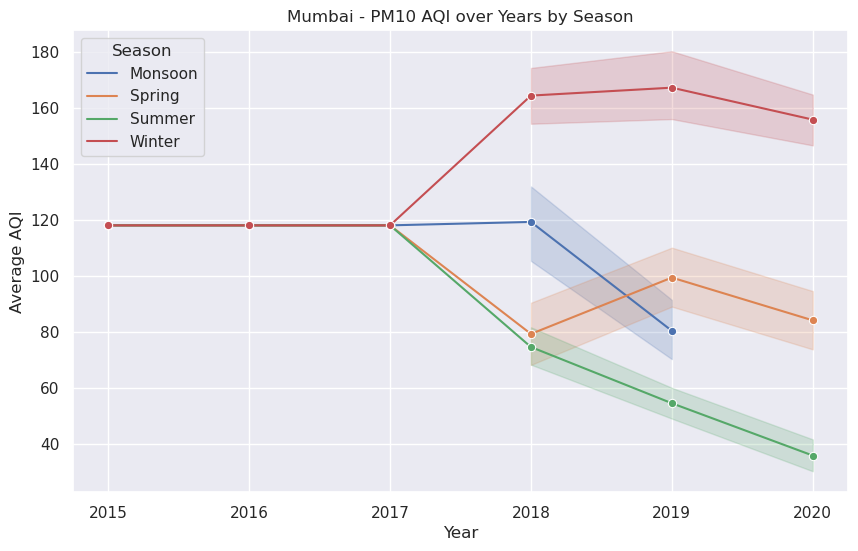

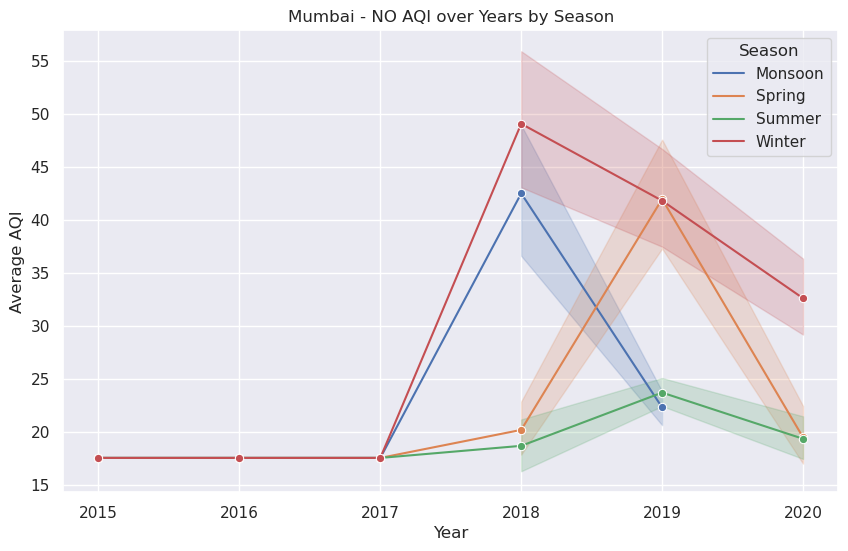

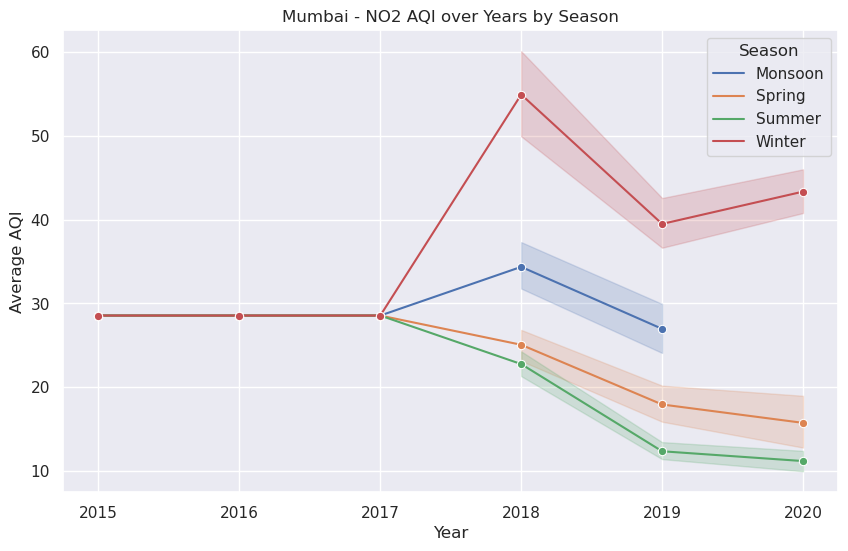

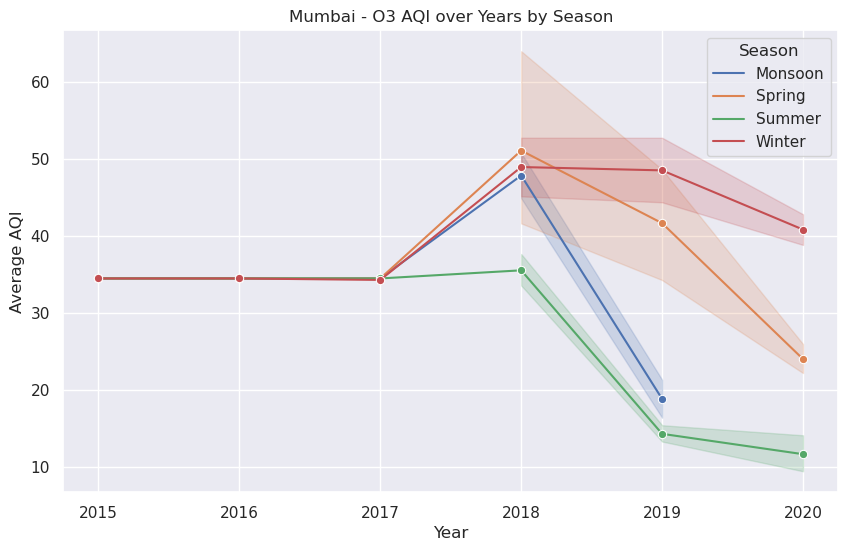

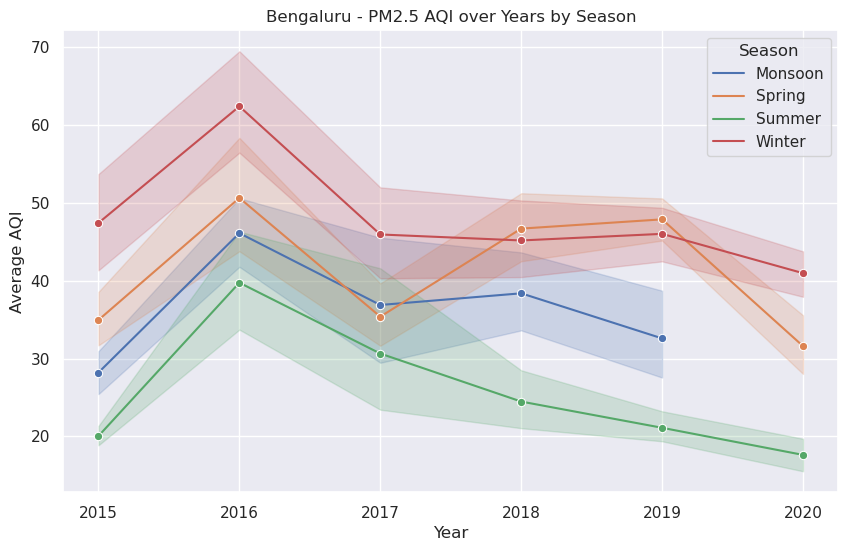

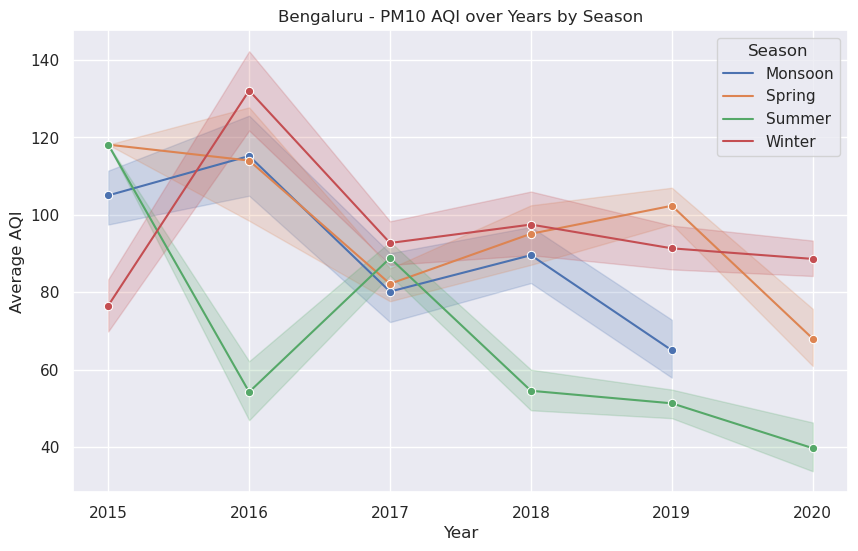

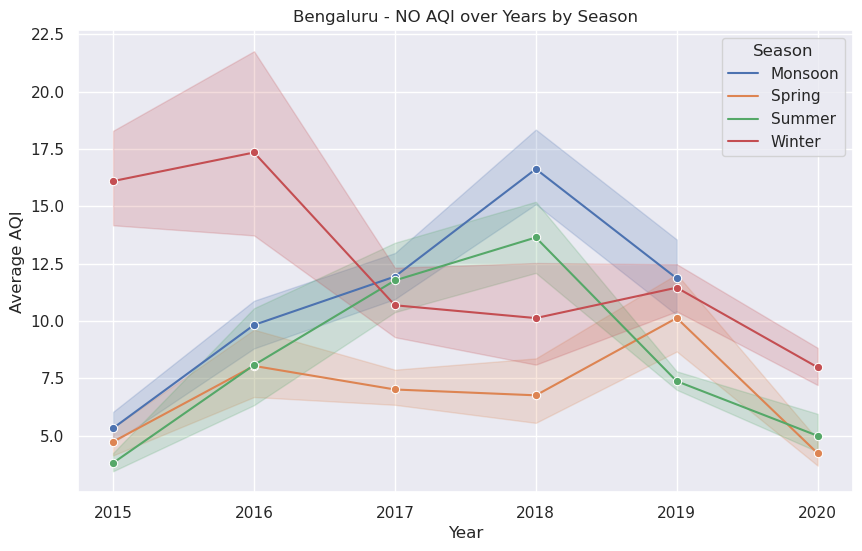

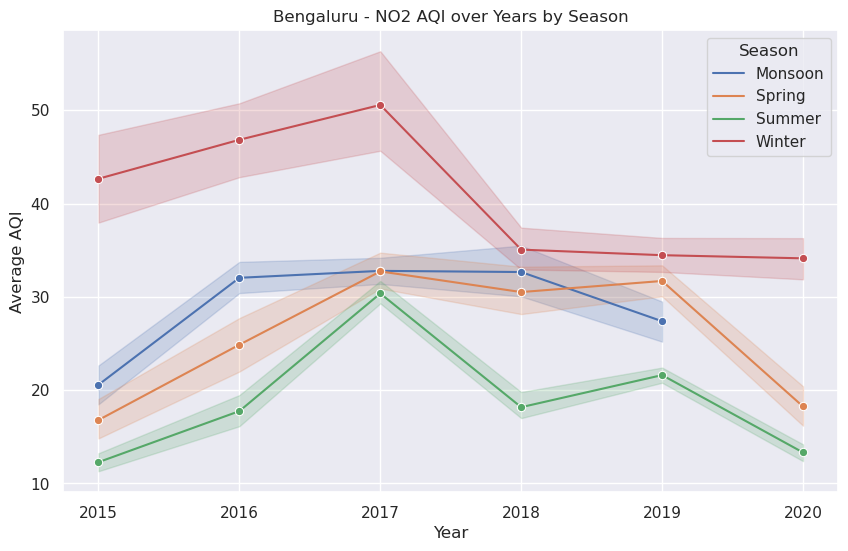

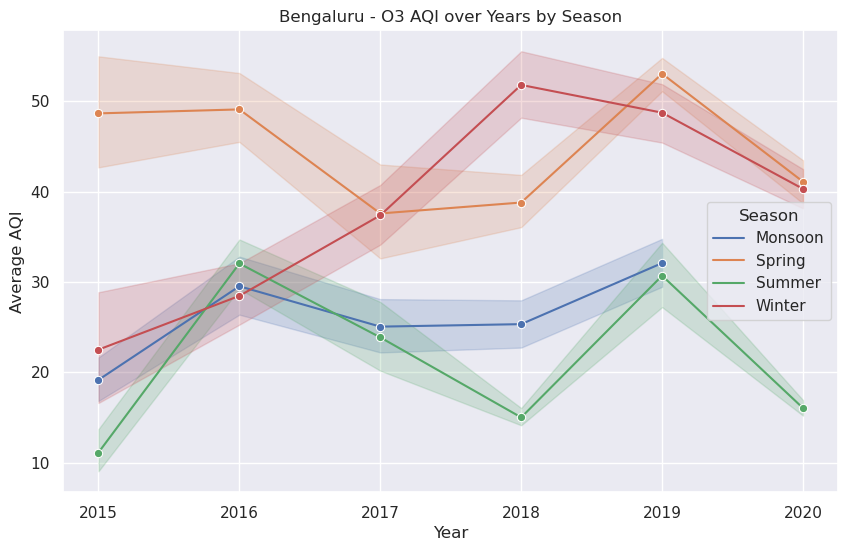

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant columns for analysis
cities_of_interest = ['Delhi', 'Mumbai', 'Bengaluru']  # Select cities of interest
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'O3']     # Select pollutants of interest

# Filter data for selected cities and pollutants
filtered_data = city_day_df[city_day_df['City'].isin(cities_of_interest)][['Year', 'Season', 'City'] + pollutants + ['AQI']]

# Group data and calculate average AQI
grouped_data = filtered_data.groupby(['Year', 'Season', 'City', 'AQI']).mean().reset_index()

# Create line plots
for city in cities_of_interest:
    for pollutant in pollutants:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=grouped_data[grouped_data['City'] == city], x='Year', y=pollutant, hue='Season', marker='o')
        plt.title(f'{city} - {pollutant} AQI over Years by Season')
        plt.ylabel('Average AQI')
        plt.legend(title='Season')
        plt.grid(True)
        plt.show()


In [35]:
# Select relevant columns
cities_of_interest = ['Ahmedabad','Delhi','Gurugram','Lucknow','Patna','Visakhapatnam']
columns_to_print = ['City', 'Year', 'Month', 'Season', 'AQI', 'AQI_Bucket']

# Filter data for selected cities
filtered_data = city_day_df[city_day_df['City'].isin(cities_of_interest)][columns_to_print]

# Print the data
print(filtered_data)

filtered_data.head(30)

                City  Year  Month  Season     AQI    AQI_Bucket
0          Ahmedabad  2015      1  Winter  166.46      Moderate
1          Ahmedabad  2015      1  Winter  166.46      Moderate
2          Ahmedabad  2015      1  Winter  166.46      Moderate
3          Ahmedabad  2015      1  Winter  166.46      Moderate
4          Ahmedabad  2015      1  Winter  166.46      Moderate
...              ...   ...    ...     ...     ...           ...
29526  Visakhapatnam  2020      6  Summer   41.00          Good
29527  Visakhapatnam  2020      6  Summer   70.00  Satisfactory
29528  Visakhapatnam  2020      6  Summer   68.00  Satisfactory
29529  Visakhapatnam  2020      6  Summer   54.00  Satisfactory
29530  Visakhapatnam  2020      7  Summer   50.00          Good

[11026 rows x 6 columns]


City  Year  Month  Season     AQI AQI_Bucket
0   Ahmedabad  2015      1  Winter  166.46   Moderate
1   Ahmedabad  2015      1  Winter  166.46   Moderate
2   Ahmedabad  2015      1  Winter  166.46   Moderate
3   Ahmedabad  2015      1  Winter  166.46   Moderate
4   Ahmedabad  2015      1  Winter  166.46   Moderate
5   Ahmedabad  2015      1  Winter  166.46   Moderate
6   Ahmedabad  2015      1  Winter  166.46   Moderate
7   Ahmedabad  2015      1  Winter  166.46   Moderate
8   Ahmedabad  2015      1  Winter  166.46   Moderate
9   Ahmedabad  2015      1  Winter  166.46   Moderate
10  Ahmedabad  2015      1  Winter  166.46   Moderate
11  Ahmedabad  2015      1  Winter  166.46   Moderate
12  Ahmedabad  2015      1  Winter  166.46   Moderate
13  Ahmedabad  2015      1  Winter  166.46   Moderate
14  Ahmedabad  2015      1  Winter  166.46   Moderate
15  Ahmedabad  2015      1  Winter  166.46   Moderate
16  Ahmedabad  2015      1  Winter  166.46   Moderate
17  Ahmedabad  2015      1  Winter  166.46   Moderate
18  Ahmedabad  2015      1  Winter  166.46   Moderate
19  Ahmedabad  2015      1  Winter  166.46   Moderate
20  Ahmedabad  2015      1  Winter  166.46   Moderate
21  Ahmedabad  2015      1  Winter  166.46   Moderate
22  Ahmedabad  2015      1  Winter  166.46   Moderate
23  Ahmedabad  2015      1  Winter  166.46   Moderate
24  Ahmedabad  2015      1  Winter  166.46   Moderate
25  Ahmedabad  2015      1  Winter  166.46   Moderate
26  Ahmedabad  2015      1  Winter  166.46   Moderate
27  Ahmedabad  2015      1  Winter  166.46   Moderate
28  Ahmedabad  2015      1  Winter  209.00       Poor
29  Ahmedabad  2015      1  Winter  328.00  Very poor

# 3. Machine Learning: Predicting AQI using Regression:

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Choose features (pollutants)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Choose target variable
target = 'AQI_Bucket'

# Split the data
X = city_day_df[features]
y = city_day_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model results
model_results = {}

# Model Selection
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep
    }

# Print model results
for model_name, results in model_results.items():
    print(f'{model_name}:')
    print(f'Accuracy: {results["Accuracy"]:.2f}')
    print('Classification Report:')
    print(results['Classification Report'])
    print('=' * 50)


Random Forest:
Accuracy: 0.82
Classification Report:
{'Good': {'precision': 0.8066298342541437, 'recall': 0.6160337552742616, 'f1-score': 0.6985645933014355, 'support': 237}, 'Moderate': {'precision': 0.8547877937565767, 'recall': 0.8820123054650741, 'f1-score': 0.868186676166726, 'support': 2763}, 'Poor': {'precision': 0.6871165644171779, 'recall': 0.6075949367088608, 'f1-score': 0.6449136276391555, 'support': 553}, 'Satisfactory': {'precision': 0.818783865141481, 'recall': 0.8441961514587213, 'f1-score': 0.8312958435207825, 'support': 1611}, 'Severe': {'precision': 0.8524590163934426, 'recall': 0.7647058823529411, 'f1-score': 0.8062015503875968, 'support': 272}, 'Very poor': {'precision': 0.7546777546777547, 'recall': 0.7707006369426752, 'f1-score': 0.7626050420168069, 'support': 471}, 'accuracy': 0.8210597596072456, 'macro avg': {'precision': 0.7957424714400961, 'recall': 0.7475406113670889, 'f1-score': 0.7686278888387506, 'support': 5907}, 'weighted avg': {'precision': 0.8192497522

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Filter data for the cities you're interested in
cities_of_interest = ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam'] 
data = city_day_df[city_day_df['City'].isin(cities_of_interest)]

# Choose pollutants as features
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Choose target variable
target = 'AQI_Bucket'

# Split the data
X = city_day_df[pollutants]
y = city_day_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

        Good       0.81      0.62      0.70       237
    Moderate       0.85      0.88      0.87      2763
        Poor       0.69      0.61      0.64       553
Satisfactory       0.82      0.84      0.83      1611
      Severe       0.85      0.76      0.81       272
   Very poor       0.75      0.77      0.76       471

    accuracy                           0.82      5907
   macro avg       0.80      0.75      0.77      5907
weighted avg       0.82      0.82      0.82      5907

